Copyright 2020 Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.


# Naive Bayes: Problem solving

In this session, we will use the `mushroom` dataset.
This dataset describes mushrooms along various nominal variables and labels them as poisonous or edible.
Because the original dataset is a fair bit larger, we've randomly sampled 2000 rows.

The goal is to predict `class`: whether the mushroom is poisonous or not.

| Variable                 | Type    | Description                                                                                         |
|:--------------------------|:---------|:-----------------------------------------------------------------------------------------------------|
| cap-shape                | Nominal | bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s                                                |
| cap-surface              | Nominal | fibrous=f,grooves=g,scaly=y,smooth=s                                                                |
| cap-color                | Nominal | brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y                    |
| bruises?                 | Nominal | bruises=t,no=f                                                                                      |
| odor                     | Nominal | almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s                        |
| gill-attachment          | Nominal | attached=a,descending=d,free=f,notched=n                                                            |
| gill-spacing             | Nominal | close=c,crowded=w,distant=d                                                                         |
| gill-size                | Nominal | broad=b,narrow=n                                                                                    |
| gill-color               | Nominal | black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y |
| stalk-shape              | Nominal | enlarging=e,tapering=t                                                                              |
| stalk-surface-above-ring | Nominal | fibrous=f,scaly=y,silky=k,smooth=s                                                                  |
| stalk-surface-below-ring | Nominal | fibrous=f,scaly=y,silky=k,smooth=s                                                                  |
| stalk-color-above-ring   | Nominal | brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y                            |
| stalk-color-below-ring   | Nominal | brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y                            |
| veil-type                | Nominal | partial=p,universal=u                                                                               |
| veil-color               | Nominal | brown=n,orange=o,white=w,yellow=y                                                                   |
| ring-number              | Nominal | none=n,one=o,two=t                                                                                  |
| ring-type                | Nominal | cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z                      |
| spore-print-color        | Nominal | black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y                      |
| population               | Nominal | abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y                                 |
| habitat                  | Nominal | grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d                                       |
| class                    | Nominal | edible or poisonous                                                                                 |

Source: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Nursery)

## Load data

Import `pandas` so we can load a dataframe.

In [17]:
import pandas as pd

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="A]5Vf/x,=8dk=KKk3OrJ">pd</variable></variables><block type="importAs" id="G*NhDz5Jo?CcaJf3rUv}" x="150" y="308"><field name="libraryName">pandas</field><field name="libraryAlias" id="A]5Vf/x,=8dk=KKk3OrJ">pd</field></block></xml>

Load the dataframe with `datasets/mushroom.csv`.

In [18]:
dataframe = pd.read_csv('datasets/mushroom.csv')

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable><variable id="A]5Vf/x,=8dk=KKk3OrJ">pd</variable></variables><block type="variables_set" id="FJGldw(qFp?V=E]uaN)4" x="31" y="222"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><value name="VALUE"><block type="varDoMethod" id="4s18v%0iqE%_l@{fLYCo"><field name="VAR" id="A]5Vf/x,=8dk=KKk3OrJ">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="INPUT"><block type="lists_create_with" id="x*dHwc!e,/XY5e1C_ak1"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="tN4Jmaffy/={ZFo;uu;W"><field name="TEXT">datasets/mushroom.csv</field></block></value></block></value></block></value></block><block type="variables_get" id="yN6MT1B[)Pk)cEECN_YZ" x="31" y="286"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field></block></xml>

class cap-shape cap-surface  ... spore-print-color population habitat
0        p         x           y  ...                 h          v       g
1        p         f           y  ...                 w          v       p
2        e         x           y  ...                 n          s       g
3        e         f           y  ...                 h          v       d
4        e         b           y  ...                 k          s       g
...    ...       ...         ...  ...               ...        ...     ...
1995     p         x           f  ...                 h          y       g
1996     e         f           f  ...                 n          v       d
1997     e         f           f  ...                 k          a       g
1998     e         x           y  ...                 k          y       d
1999     p         x           s  ...                 w          v       d

[2000 rows x 22 columns]

## Explore data

Check the data makes sense with the five figure summary.

In [19]:
dataframe.describe()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable></variables><block type="varDoMethod" id="-[lX-}4sT`|#7E(Sti)^" x="78" y="266"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><field name="MEMBER">describe</field><data>dataframe:describe</data></block></xml>

class cap-shape cap-surface  ... spore-print-color population habitat
count   2000      2000        2000  ...              2000       2000    2000
unique     2         5           4  ...                 9          6       7
top        e         x           y  ...                 w          v       d
freq    1059       911         803  ...               600       1013     793

[4 rows x 22 columns]

------------------
**QUESTION:**

Did any variables have NaN? How do you know?

**ANSWER: (click here to edit)**

*All have a count of 2000, which is our # of rows, so no NaN.*

-------------------

**QUESTION:**

Looking at `freq` for each variable, how do you think the levels of these variables are distributed?

**ANSWER: (click here to edit)**

*Guessing unevenly. Plotting would reveal.*

-------------------

Plot each variable separately.

First import `plotly.express`.

In [20]:
import plotly.express as px

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable></variables><block type="importAs" id="JKd}DIrGfV*IelKZ!4ls" x="129" y="219"><field name="libraryName">plotly.express</field><field name="libraryAlias" id="+yh,Zg{hON]zy6D~.rH#">px</field></block></xml>

Create an empty histogram figure.

In [21]:
fig = px.histogram()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="AriMCkUM!81vTeAcb+6,">fig</variable><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable></variables><block type="variables_set" id="Ud?VzKCO`DdWL1!WV3u0" x="72" y="201"><field name="VAR" id="AriMCkUM!81vTeAcb+6,">fig</field><value name="VALUE"><block type="varDoMethod" id="}D2RF2=Z|$`_ypJyLDYt"><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">histogram</field><data>px:histogram</data></block></value></block></xml>

Plot histograms of all the variables in a loop.

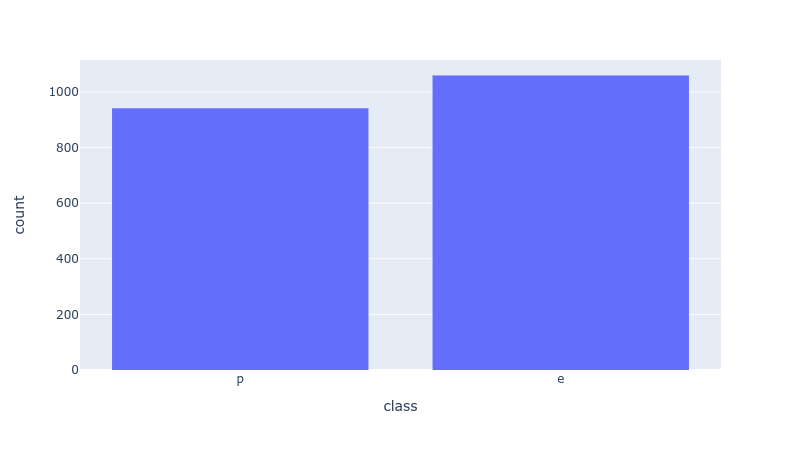

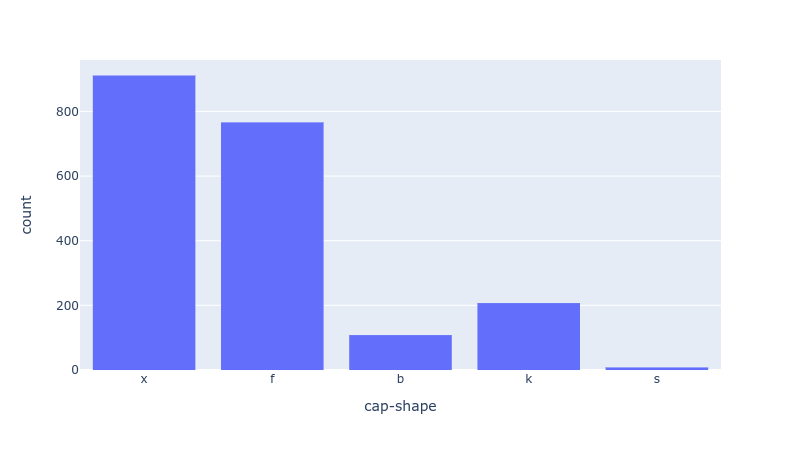

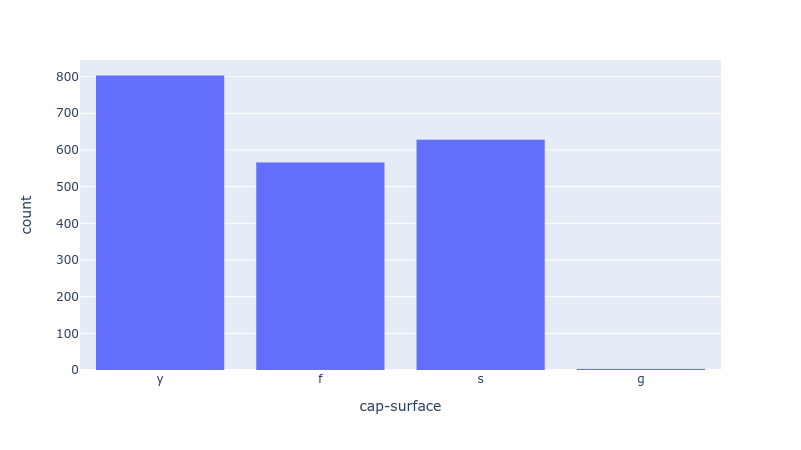

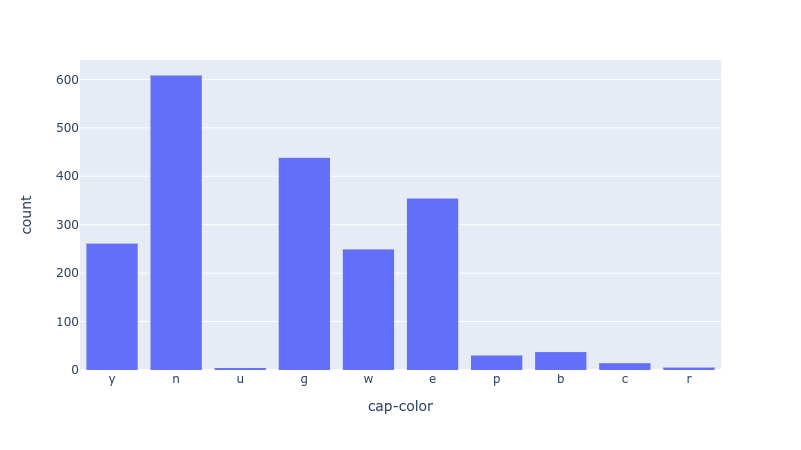

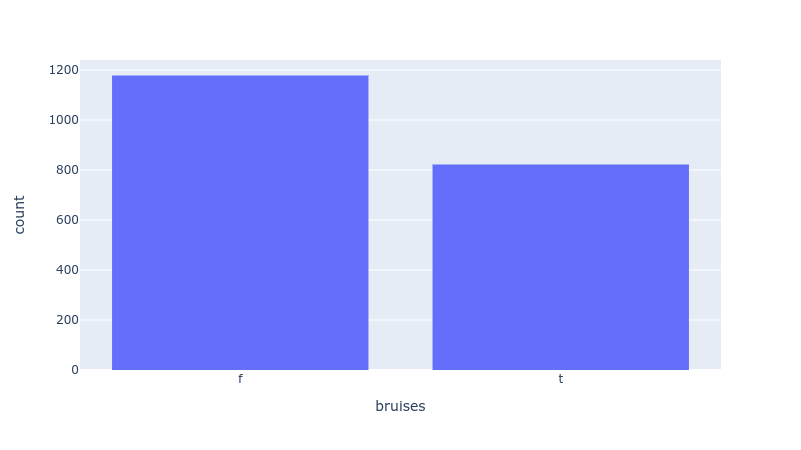

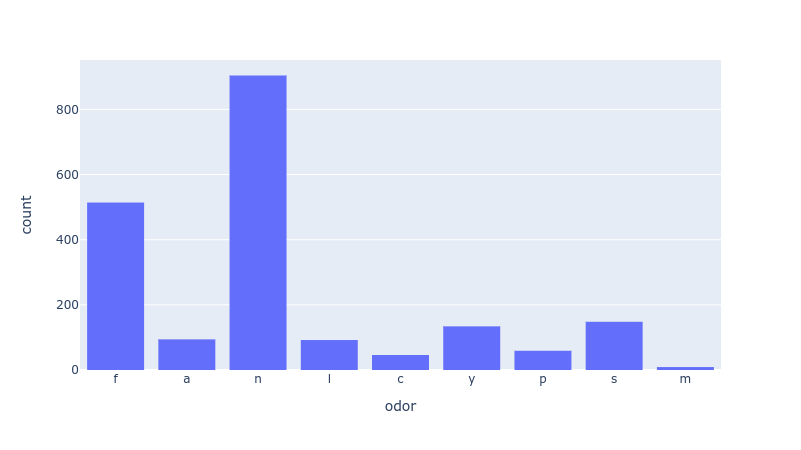

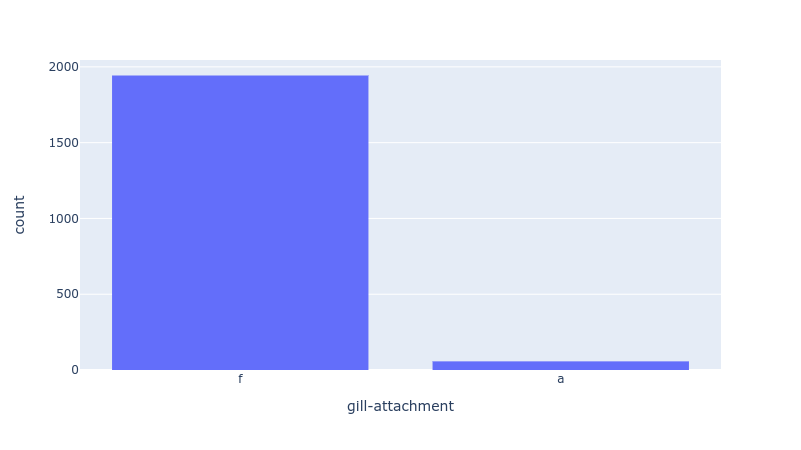

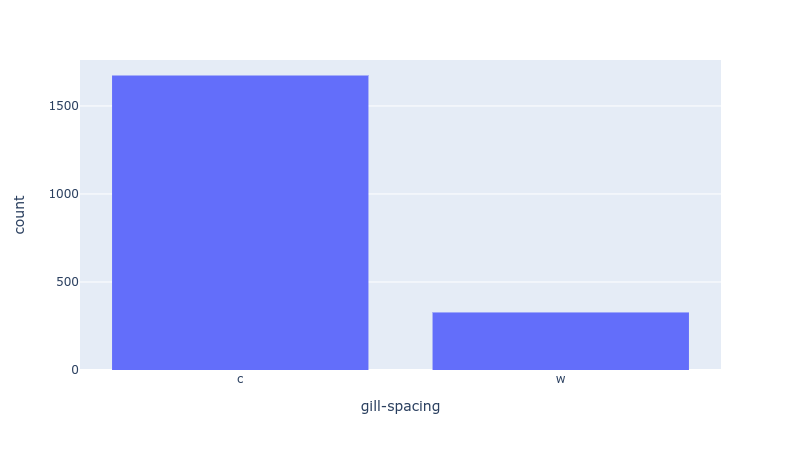

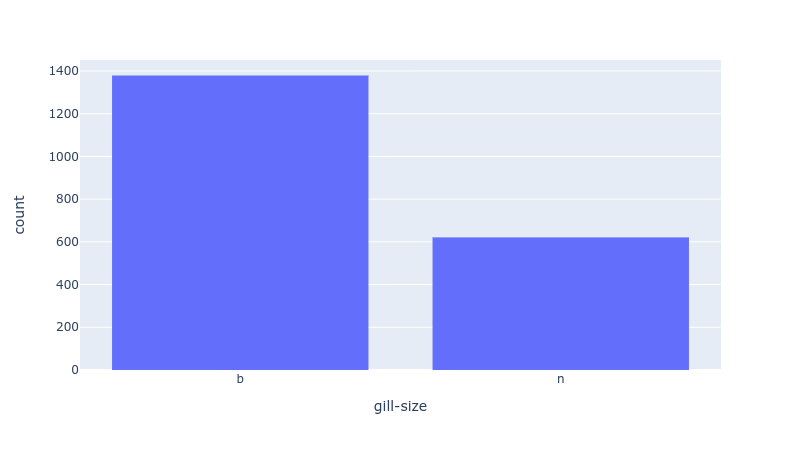

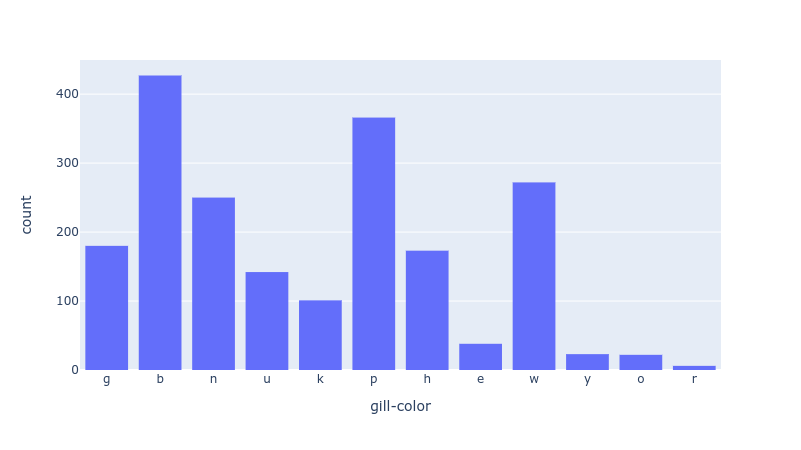

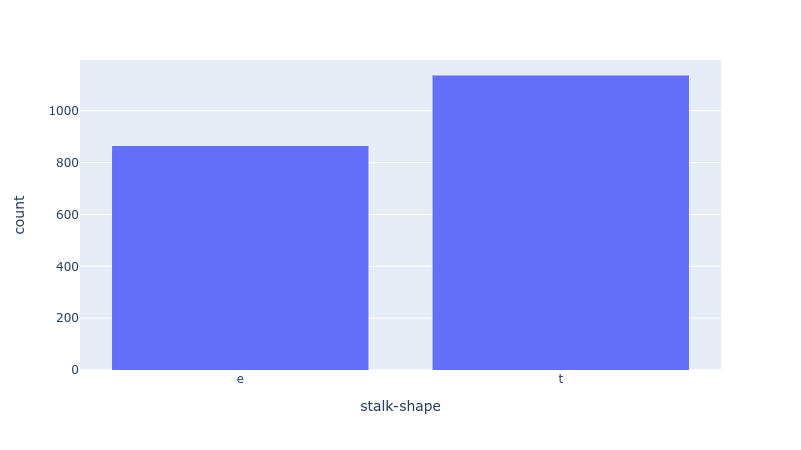

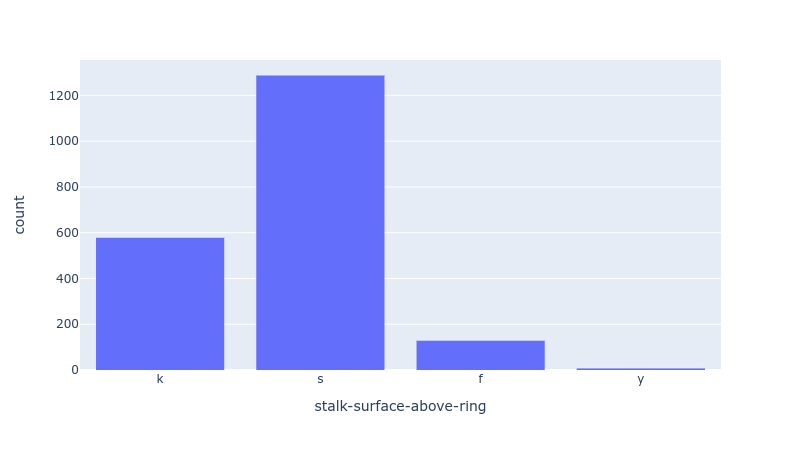

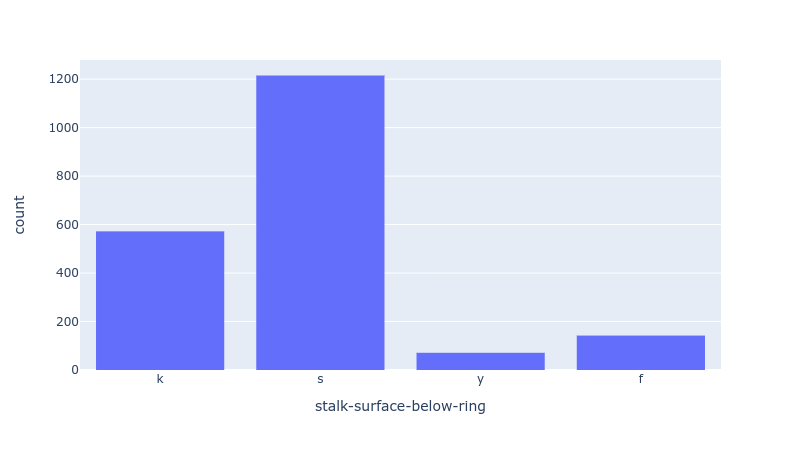

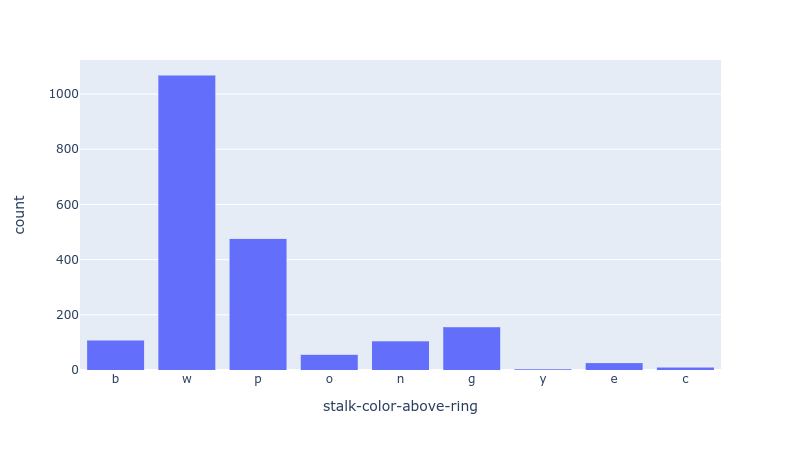

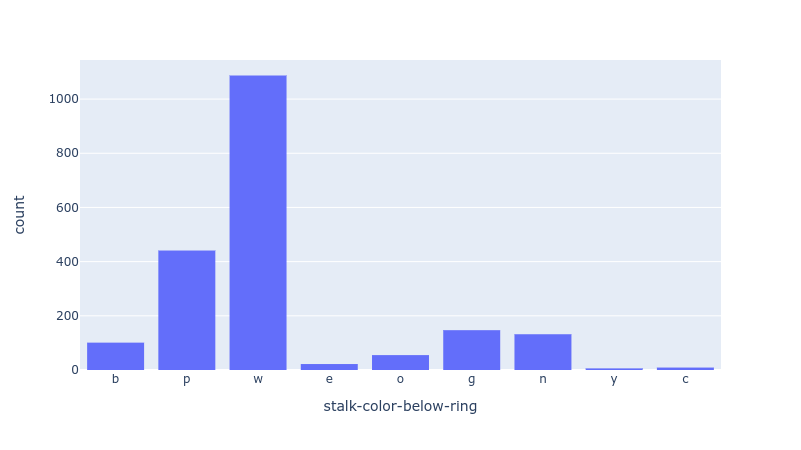

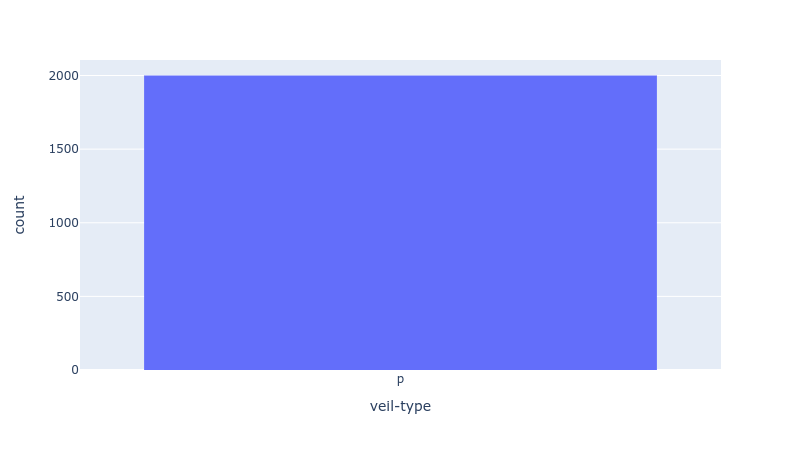

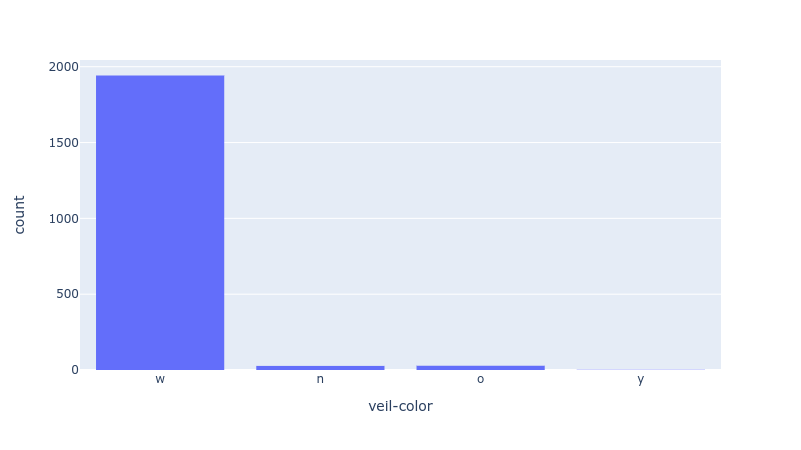

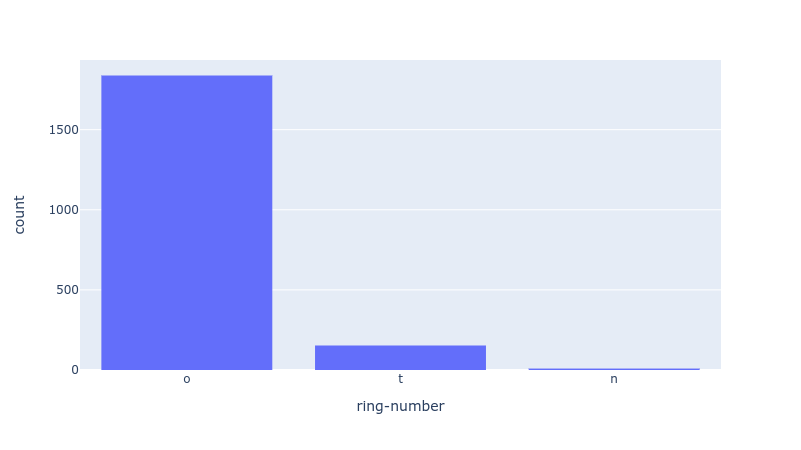

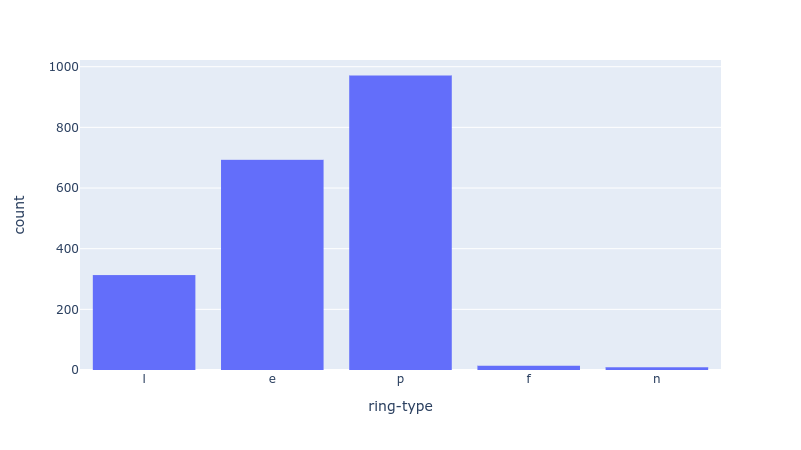

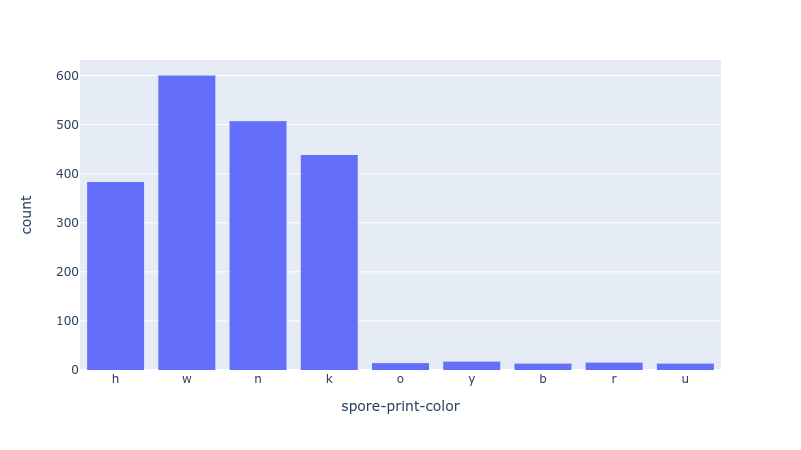

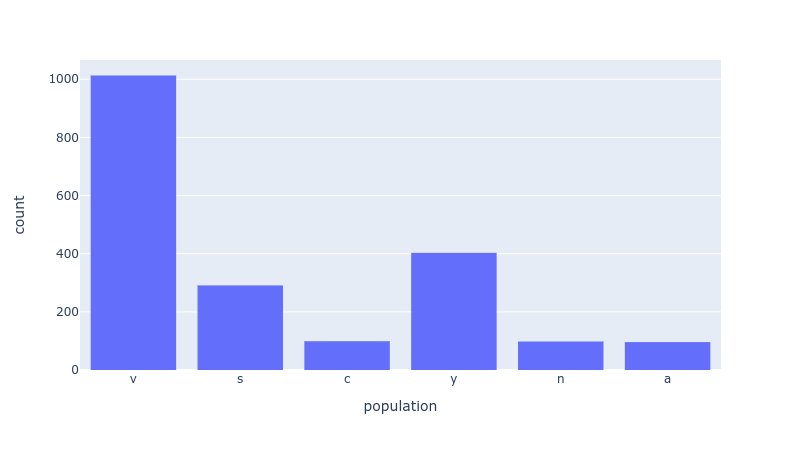

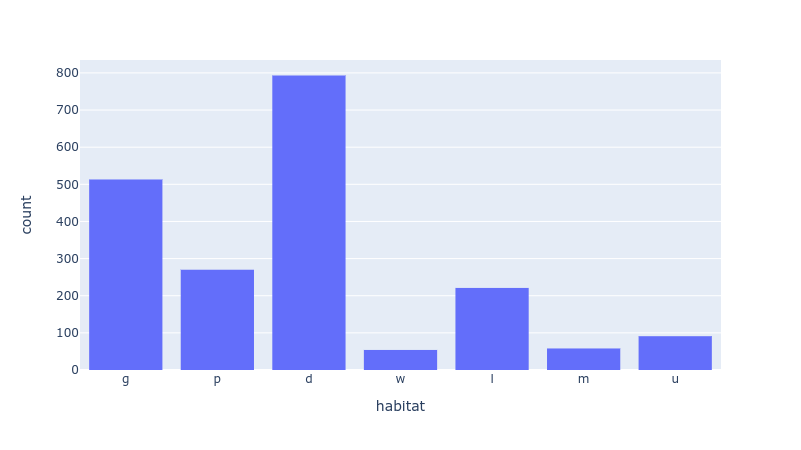

In [22]:
for i in dataframe.columns:
  fig = px.histogram(dataframe, x=i)
  (fig.show())

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="n+-#0`*wD8rg+dSg6M^w">i</variable><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable><variable id="AriMCkUM!81vTeAcb+6,">fig</variable><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable></variables><block type="controls_forEach" id="7YJ)K?q9poiHMo2hO,si" x="159" y="297"><field name="VAR" id="n+-#0`*wD8rg+dSg6M^w">i</field><value name="LIST"><block type="varGetProperty" id="k3#lLk(++xN{Qk3$B!$/"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><field name="MEMBER">columns</field><data>dataframe:columns</data></block></value><statement name="DO"><block type="variables_set" id="JN`QXdt~zSW=Hr{(pqls"><field name="VAR" id="AriMCkUM!81vTeAcb+6,">fig</field><value name="VALUE"><block type="varDoMethod" id="{:}eVR02P7FStzQGj0GV"><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">histogram</field><data>px:histogram</data><value name="INPUT"><block type="lists_create_with" id="+1ab50iuN1{=}kB6mhZH"><mutation items="2"></mutation><value name="ADD0"><block type="variables_get" id="mQ9=gXbU-Tlr[a!+Z~PN"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="hJq@W1q];BsF7]9/8:rP"><field name="CODE">x=i</field></block></value></block></value></block></value><next><block type="valueNoOutputCodeBlock" id="(zDrmSRou~?8NOFz?_:t"><field name="CODE"></field><value name="INPUT"><block type="varDoMethod" id="S6kF2H)`W^?,.3{VU8x1"><field name="VAR" id="AriMCkUM!81vTeAcb+6,">fig</field><field name="MEMBER">show</field><data>fig:show</data></block></value></block></next></block></statement></block></xml>

------------------
**QUESTION:**

What do you think about the distribution of levels of the variables now?

**ANSWER: (click here to edit)**

*Mostly pretty uneven.*

-------------------

## Prepare train/test sets

Separate our predictors (`X`) from our class label (`Y`), putting each into its own dataframe.

In [23]:
X = dataframe.drop(columns=["class"])
Y = dataframe[['class']]

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_z/H/tTnOYS1Lla2~;*0">X</variable><variable id="Y+grzOaS*0=OHV6zO8m/">dataframe</variable><variable id="o8#tp%!,_Okj2aVwX(DL">Y</variable></variables><block type="variables_set" id="M9g^9:hbZQ0Cb9jKq9V6" x="27" y="188"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field><value name="VALUE"><block type="varDoMethod" id="k7t38%eJz)@=B8{vW^(u"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><field name="MEMBER">drop</field><data>dataframe:drop</data><value name="INPUT"><block type="lists_create_with" id="GF+zQWW-#ABEFw$9!#^8"><mutation items="1"></mutation><value name="ADD0"><block type="dummyOutputCodeBlock" id="fk{P(H^@/_!^1+tw-Hi*"><field name="CODE">columns=["class"]</field></block></value></block></value></block></value><next><block type="variables_set" id=":eCC|=CT/c:_fzcI.h5%"><field name="VAR" id="o8#tp%!,_Okj2aVwX(DL">Y</field><value name="VALUE"><block type="indexer" id="A%ev_@Jrd7:a(Gozw{Zv"><field name="VAR" id="Y+grzOaS*0=OHV6zO8m/">dataframe</field><value name="INDEX"><block type="lists_create_with" id="v`ZwcnYa3]GMVDC!T3al"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="H9b;qzWmM({49_lwSk(2"><field name="TEXT">class</field></block></value></block></value></block></value></block></next></block></xml>

Convert the nominal variables in `X` to dummies, storing the result in `X`. 
Keep all levels. 
We're doing this because we will use Bernoulli naive Bayes.

In [24]:
X = pd.get_dummies(X)

X

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_z/H/tTnOYS1Lla2~;*0">X</variable><variable id="A]5Vf/x,=8dk=KKk3OrJ">pd</variable></variables><block type="variables_set" id="N[``Tj{Y-X9-:{:,LZie" x="17" y="246"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field><value name="VALUE"><block type="varDoMethod" id="!snzGlMsbL.%p)$iCu~-"><field name="VAR" id="A]5Vf/x,=8dk=KKk3OrJ">pd</field><field name="MEMBER">get_dummies</field><data>pd:get_dummies</data><value name="INPUT"><block type="lists_create_with" id="iiIg%n|P;1H4Uu_(3Eqf"><mutation items="1"></mutation><value name="ADD0"><block type="variables_get" id="!(L^?R}r`]R[RgQMDh{H"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field></block></value></block></value></block></value></block><block type="variables_get" id="esj).}av[rq%)lp@R1MD" x="31" y="312"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field></block></xml>

cap-shape_b  cap-shape_f  cap-shape_k  ...  habitat_p  habitat_u  habitat_w
0               0            0            0  ...          0          0          0
1               0            1            0  ...          1          0          0
2               0            0            0  ...          0          0          0
3               0            1            0  ...          0          0          0
4               1            0            0  ...          0          0          0
...           ...          ...          ...  ...        ...        ...        ...
1995            0            0            0  ...          0          0          0
1996            0            1            0  ...          0          0          0
1997            0            1            0  ...          0          0          0
1998            0            0            0  ...          0          0          0
1999            0            0            0  ...          0          0          0

[2000 rows x 111 columns]

To split the data into train/test sets, import `model_selection`.

In [25]:
import sklearn.model_selection as model_selection

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</variable></variables><block type="importAs" id="E{QJ$O@lc8u.;OTWdVgf" x="-89" y="168"><field name="libraryName">sklearn.model_selection</field><field name="libraryAlias" id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</field></block></xml>

And do the actual spliting of data, using `random_state=1`.

In [26]:
splits = model_selection.train_test_split(X, Y, random_state=1)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable><variable id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</variable><variable id="_z/H/tTnOYS1Lla2~;*0">X</variable><variable id="o8#tp%!,_Okj2aVwX(DL">Y</variable></variables><block type="variables_set" id="HpD!.HSC`PPRg]21i*7c" x="-102" y="134"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field><value name="VALUE"><block type="varDoMethod" id="fUetl3$Ak=SI~T6T5!6c"><field name="VAR" id="-q~R*yx.VGQ@%!0Q+!gh">model_selection</field><field name="MEMBER">train_test_split</field><data>model_selection:train_test_split</data><value name="INPUT"><block type="lists_create_with" id="uUY%r2L/7acQcS/KbQvx"><mutation items="3"></mutation><value name="ADD0"><block type="variables_get" id="jN^;NIVaV%22*W_^|!uK"><field name="VAR" id="_z/H/tTnOYS1Lla2~;*0">X</field></block></value><value name="ADD1"><block type="variables_get" id="OOZSj;YDm{T6q%{~5?B1"><field name="VAR" id="o8#tp%!,_Okj2aVwX(DL">Y</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="Gg*^%q4qIJwc*of,V|rb"><field name="CODE">random_state=1</field></block></value></block></value></block></value></block></xml>

### Fit model

Import libraries for:

- Naive Bayes
- Metrics
- Ravel

In [27]:
import sklearn.naive_bayes as naive_bayes
import numpy as np
import sklearn.metrics as metrics

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="KA0k4+i.iu,J]5!9Nj%^">naive_bayes</variable><variable id="hxqH|@PJU~wrI]t*tHgd">np</variable><variable id="jpz]0=,hLYv~rN^#0dFO">metrics</variable></variables><block type="importAs" id=")Z,7_rQ8n$[soP8C+|xJ" x="51" y="43"><field name="libraryName">sklearn.naive_bayes</field><field name="libraryAlias" id="KA0k4+i.iu,J]5!9Nj%^">naive_bayes</field><next><block type="importAs" id="#n~K{o=Qop7Z[_YEjs`u"><field name="libraryName">numpy</field><field name="libraryAlias" id="hxqH|@PJU~wrI]t*tHgd">np</field><next><block type="importAs" id="{H02K*?VA0K3yr,FD/;h"><field name="libraryName">sklearn.metrics</field><field name="libraryAlias" id="jpz]0=,hLYv~rN^#0dFO">metrics</field></block></next></block></next></block></xml>

Create the Bernoulli naive Bayes model.

In [28]:
naiveBayes = naive_bayes.BernoulliNB()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=".sY;T8@Q1`)*lHl?C]]T">naiveBayes</variable><variable id="KA0k4+i.iu,J]5!9Nj%^">naive_bayes</variable></variables><block type="variables_set" id="}81D/tZY#o}$E:M}:u4x" x="9" y="330"><field name="VAR" id=".sY;T8@Q1`)*lHl?C]]T">naiveBayes</field><value name="VALUE"><block type="varCreateObject" id="ar7keIh-Yv)+b+#Edsp_"><field name="VAR" id="KA0k4+i.iu,J]5!9Nj%^">naive_bayes</field><field name="MEMBER">BernoulliNB</field><data>naive_bayes:BernoulliNB</data></block></value></block></xml>

Train the model by calling `fit` on it.

In [29]:
naiveBayes.fit(splits[0], np.ravel(splits[2]))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=".sY;T8@Q1`)*lHl?C]]T">naiveBayes</variable><variable id="hxqH|@PJU~wrI]t*tHgd">np</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="varDoMethod" id="-@fm,911cJiCu@jkys%R" x="-94" y="192"><field name="VAR" id=".sY;T8@Q1`)*lHl?C]]T">naiveBayes</field><field name="MEMBER">fit</field><data>naiveBayes:fit</data><value name="INPUT"><block type="lists_create_with" id="qj[~!aNmN}=v;xQ.=$%L"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="W~.ZU([-)(,-i3=bTsB|"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="GIJn[jpD_~wa}#7IO!1K"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="Rh[;nrMLN$[cFFsZC~T|"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="varDoMethod" id="~1yhID`7cKT3OGJbUA`C"><field name="VAR" id="hxqH|@PJU~wrI]t*tHgd">np</field><field name="MEMBER">ravel</field><data>np:ravel</data><value name="INPUT"><block type="lists_create_with" id="!2;YZV;l:7IzVqStgh^y"><mutation items="1"></mutation><value name="ADD0"><block type="lists_getIndex" id="YkCD57xF*SSN3[`_op{u"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="M@?wn}aoHxJYan0=AE3$"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="jNUa2BdXPG?H8|.br*@e"><field name="NUM">3</field></block></value></block></value></block></value></block></value></block></value></block></xml>

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

Get and save predictions.

In [30]:
predictions = naiveBayes.predict(splits[1])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(`;mrW|63Vww]$wlV9+1">predictions</variable><variable id=".sY;T8@Q1`)*lHl?C]]T">naiveBayes</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="variables_set" id="FM4[*FDWeN(7%iHSAfQ?" x="-89" y="291"><field name="VAR" id="(`;mrW|63Vww]$wlV9+1">predictions</field><value name="VALUE"><block type="varDoMethod" id="iyb},eS,^AG]P+e8|?_w"><field name="VAR" id=".sY;T8@Q1`)*lHl?C]]T">naiveBayes</field><field name="MEMBER">predict</field><data>naiveBayes:predict</data><value name="INPUT"><block type="lists_create_with" id="M~B*Kr~SV)~*y`D4O?Fo"><mutation items="1"></mutation><value name="ADD0"><block type="lists_getIndex" id="fZwSBC7oN~ztuILQKhjb"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="j+~A(%x]-W)Rd5k;,l#Z"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="LBFp2#($s_[4DJ8h!O;h"><field name="NUM">2</field></block></value></block></value></block></value></block></value></block></xml>

### Evaluate the model

Get the accuracy.

In [31]:
print(metrics.accuracy_score(splits[3], predictions))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="jpz]0=,hLYv~rN^#0dFO">metrics</variable><variable id="(`;mrW|63Vww]$wlV9+1">predictions</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="text_print" id="u8M]eo-vRBhX!L/a@4+J" x="-102" y="208"><value name="TEXT"><shadow type="text" id=")gVsrXo+bq|?9m0cIU/Y"><field name="TEXT">abc</field></shadow><block type="varDoMethod" id="0B;?~qgT4?Xe8I|O=P)%"><field name="VAR" id="jpz]0=,hLYv~rN^#0dFO">metrics</field><field name="MEMBER">accuracy_score</field><data>metrics:</data><value name="INPUT"><block type="lists_create_with" id="qe7YbU#WU/F|Iuks0C:c"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="13J^-{z`P=,aau/j:VF~"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="m^Z6y-8@L:s!oS)`%iJW"><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="u}VxLP~*Dbl0g4[AO,bL"><field name="NUM">4</field></block></value></block></value><value name="ADD1"><block type="variables_get" id="|3h,TPit9wg+a;bR[r$P"><field name="VAR" id="(`;mrW|63Vww]$wlV9+1">predictions</field></block></value></block></value></block></value></block></xml>

0.924


And get the recall and precision.

In [32]:
print(metrics.classification_report(splits[3], predictions))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="jpz]0=,hLYv~rN^#0dFO">metrics</variable><variable id="(`;mrW|63Vww]$wlV9+1">predictions</variable><variable id="{Yt*9=2tTC$JepE9BcRz">splits</variable></variables><block type="text_print" id="jFo8knaDn;JRZ=Fj7Tzo" x="57" y="316"><value name="TEXT"><shadow type="text" id="QWuxwm12CzEZ-r2sdwCR"><field name="TEXT">abc</field></shadow><block type="varDoMethod" id="(y`#h=AgNH6X+ahL$2L$"><field name="VAR" id="jpz]0=,hLYv~rN^#0dFO">metrics</field><field name="MEMBER">classification_report</field><data>metrics:classification_report</data><value name="INPUT"><block type="lists_create_with" id="A/#8KhfiGd[(@p,uaFFl"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="*N[l.zzXc*IdHJ-Ur0D)"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="fQYj?Tz[y/t|%9~{2Pf["><field name="VAR" id="{Yt*9=2tTC$JepE9BcRz">splits</field></block></value><value name="AT"><block type="math_number" id="V(5k43YOsHPep%LEEd9Q"><field name="NUM">4</field></block></value></block></value><value name="ADD1"><block type="variables_get" id="mX(20KX!C)d_,/ddeysr"><field name="VAR" id="(`;mrW|63Vww]$wlV9+1">predictions</field></block></value></block></value></block></value></block></xml>

              precision    recall  f1-score   support

           e       0.90      0.96      0.93       273
           p       0.95      0.88      0.91       227

    accuracy                           0.92       500
   macro avg       0.93      0.92      0.92       500
weighted avg       0.93      0.92      0.92       500



Performance is very good for both classes.

------------------
**QUESTION:**

With this level of accuracy, would you eat a mushroom that the classifer said wasn't poisonous?

**ANSWER: (click here to edit)**

*I guess it depends on how hungry I was and whether I would die if it were poisonous*

-------------------

## Visualizing

### Feature importance

To see the feature importances, create a dataframe of the probabilities of predictors given the class label, i.e. `feature_log_prob_`, then give that dataframe correct row/column names (using `index` and `columns`, and finally raise it to the power of ten (because the default output is log).

In [33]:
output = pd.DataFrame(naiveBayes.feature_log_prob_)
output.index=naiveBayes.classes_
output.columns=X.columns
output = 10 ** output

output

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="B1+(FA+B_0M9*6bKcj,o">output</variable><variable id="A]5Vf/x,=8dk=KKk3OrJ">pd</variable></variables><block type="variables_set" id="}Wi.Es$z1j2(j!@$[xbi" x="-73" y="243"><field name="VAR" id="B1+(FA+B_0M9*6bKcj,o">output</field><value name="VALUE"><block type="varCreateObject" id="Gx%*Wd|3[h`8E50G5`^N"><field name="VAR" id="A]5Vf/x,=8dk=KKk3OrJ">pd</field><field name="MEMBER">DataFrame</field><data>pd:DataFrame</data><value name="INPUT"><block type="lists_create_with" id=",r$A?`5owOJK8e89$*R$"><mutation items="1"></mutation><value name="ADD0"><block type="dummyOutputCodeBlock" id="IIag*ZRE,}l|c/d)-)27"><field name="CODE">naiveBayes.feature_log_prob_</field></block></value></block></value></block></value><next><block type="valueNoOutputCodeBlock" id="HJ|j6,(HTvSn.axRTL/E"><field name="CODE">output.index=naiveBayes.classes_</field><next><block type="valueNoOutputCodeBlock" id=")Xb`8c/$7:fp*%yI5W*d"><field name="CODE">output.columns=X.columns</field><next><block type="valueNoOutputCodeBlock" id="!y@~L4n0kGS])aK}0`Wk"><field name="CODE">output = 10 ** output</field></block></next></block></next></block></next></block><block type="variables_get" id="JWibtF{|zPl%If4..muv" x="-66" y="440"><field name="VAR" id="B1+(FA+B_0M9*6bKcj,o">output</field></block></xml>

cap-shape_b  cap-shape_f  cap-shape_k  ...  habitat_p  habitat_u     habitat_w
e     0.004584     0.103296     0.001107  ...   0.000423   0.000146  1.169961e-03
p     0.000098     0.113225     0.016361  ...   0.044881   0.002385  2.668823e-07

[2 rows x 111 columns]

Plot these feature importances in a loop, where each is a bar plot.

**Note:** This will take some time. Once it's done, you should be able to scroll down to view.

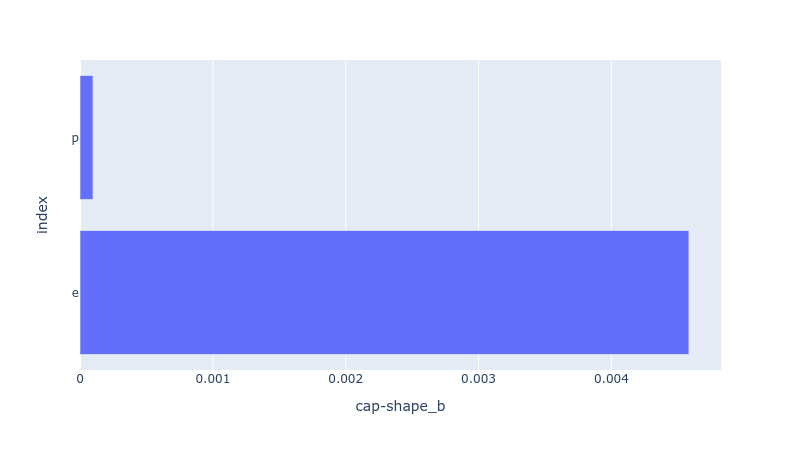

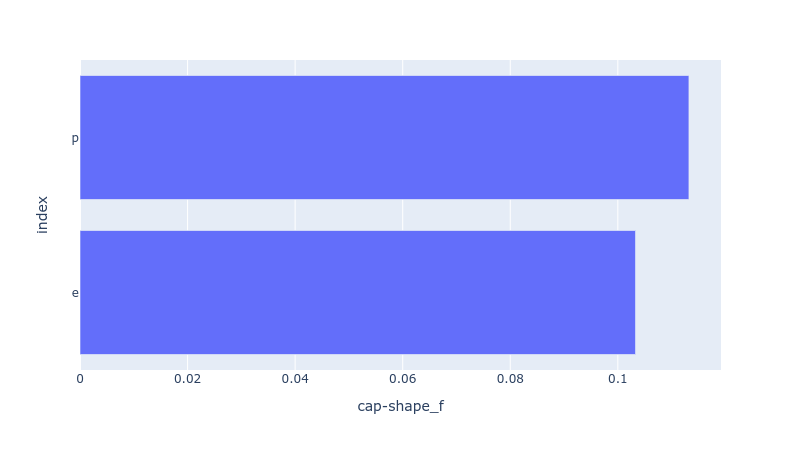

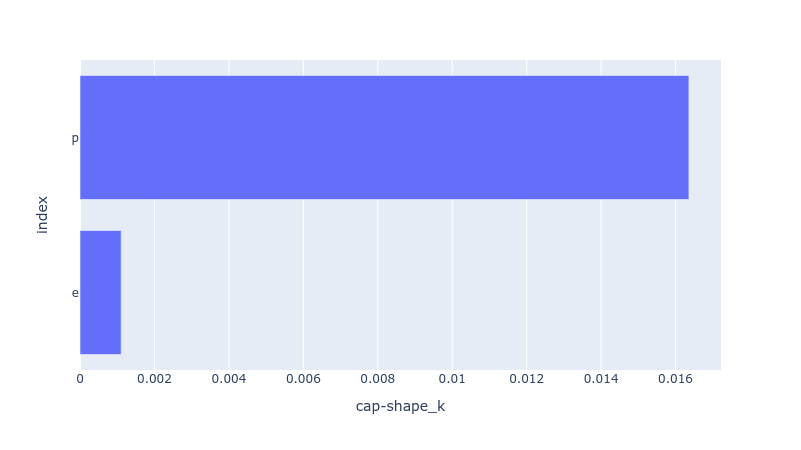

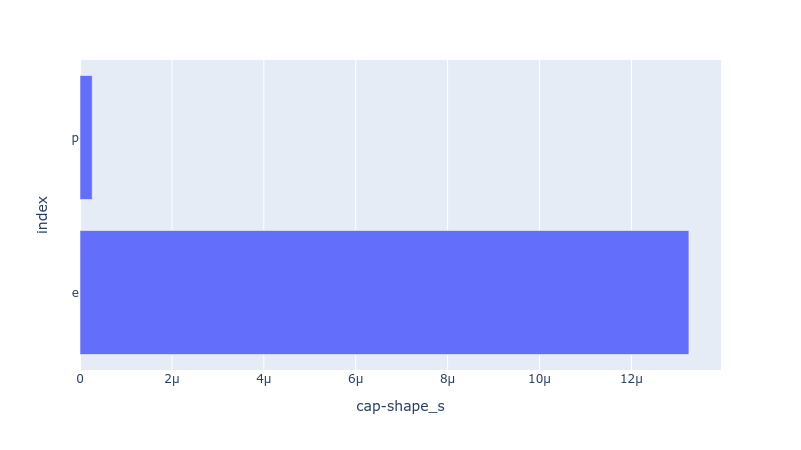

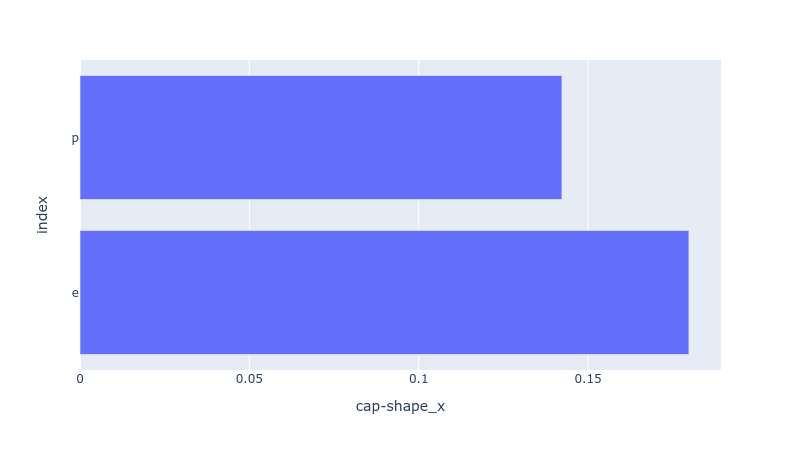

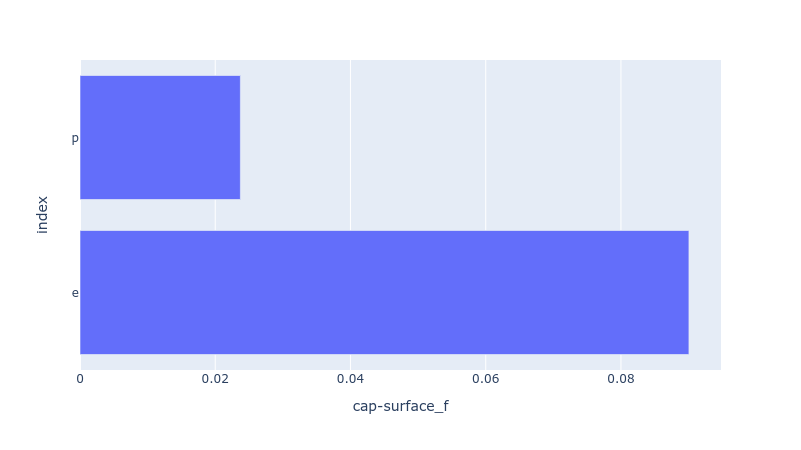

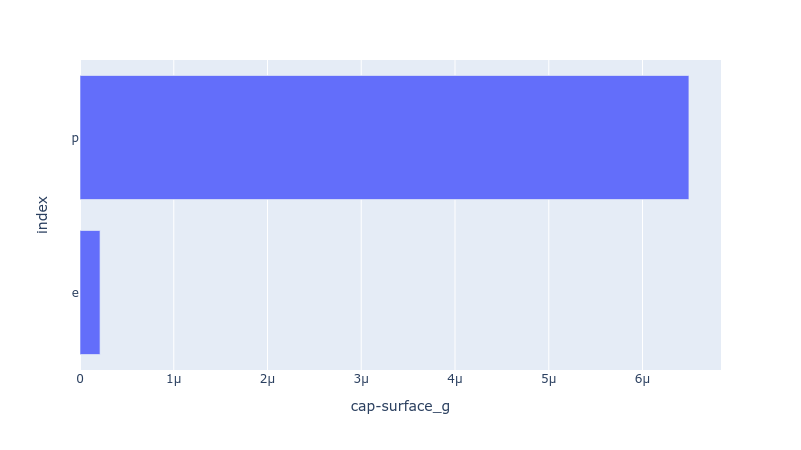

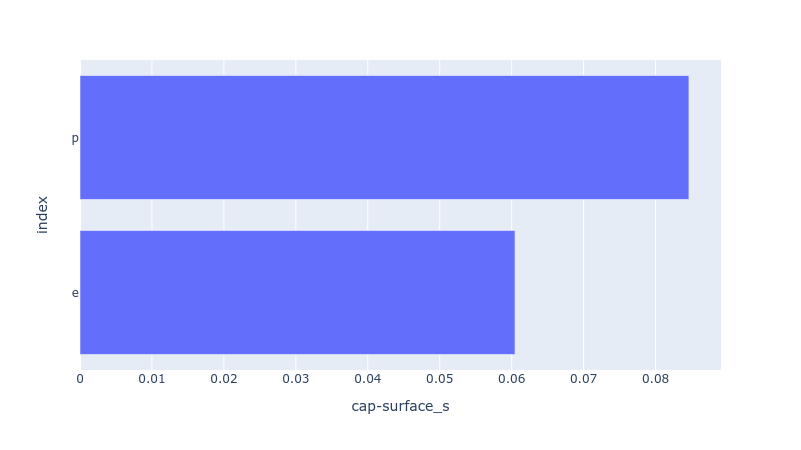

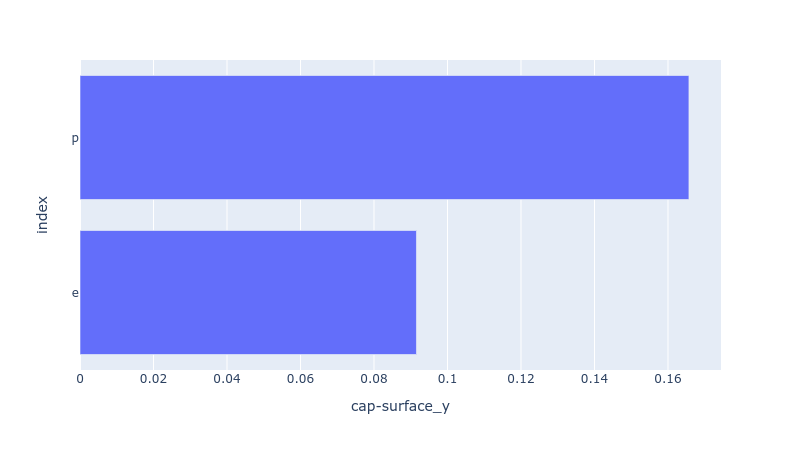

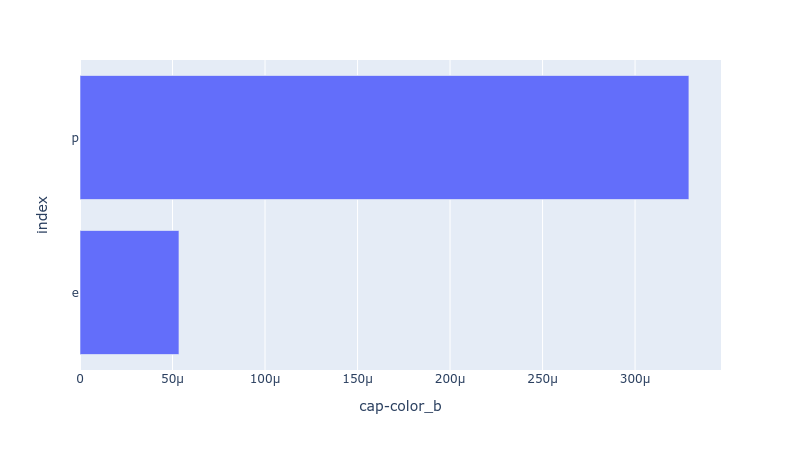

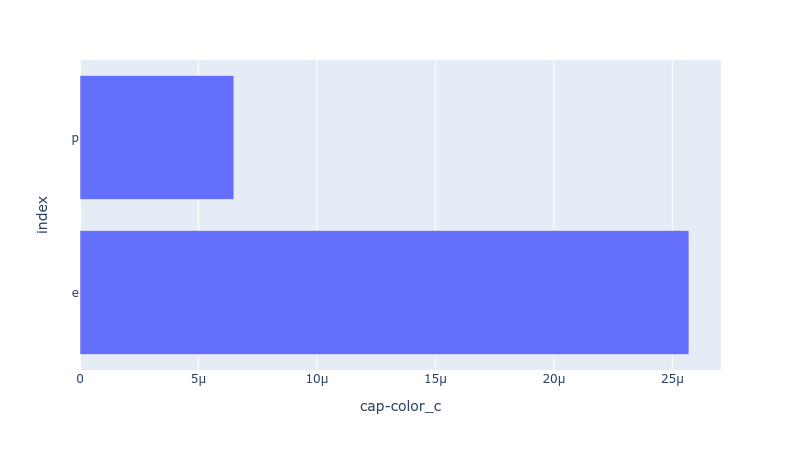

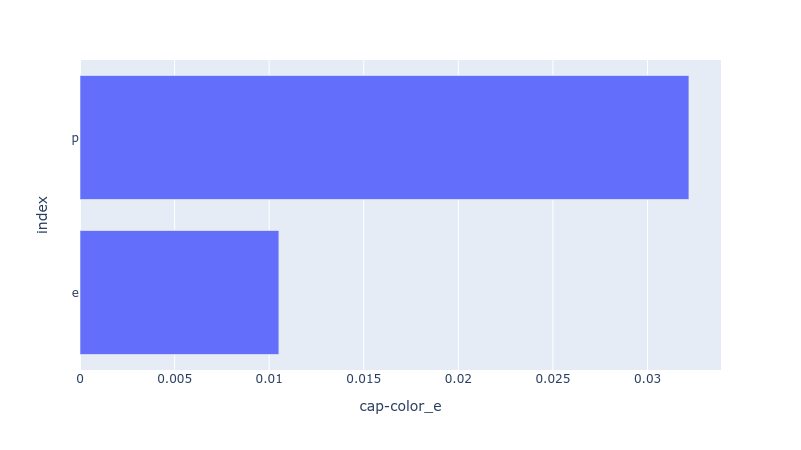

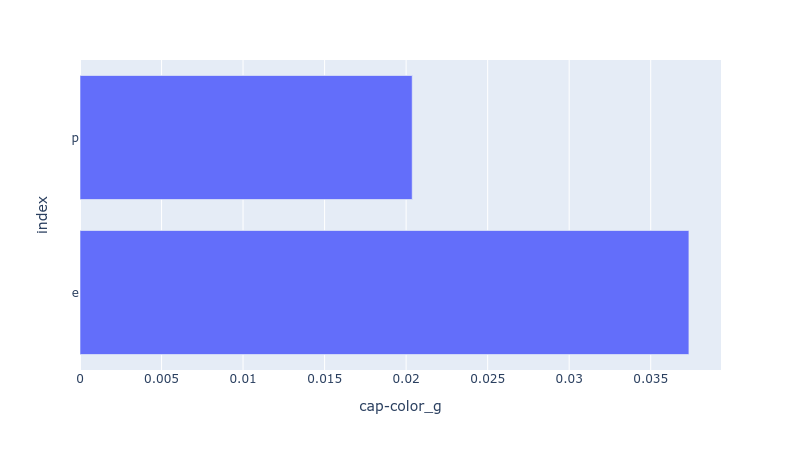

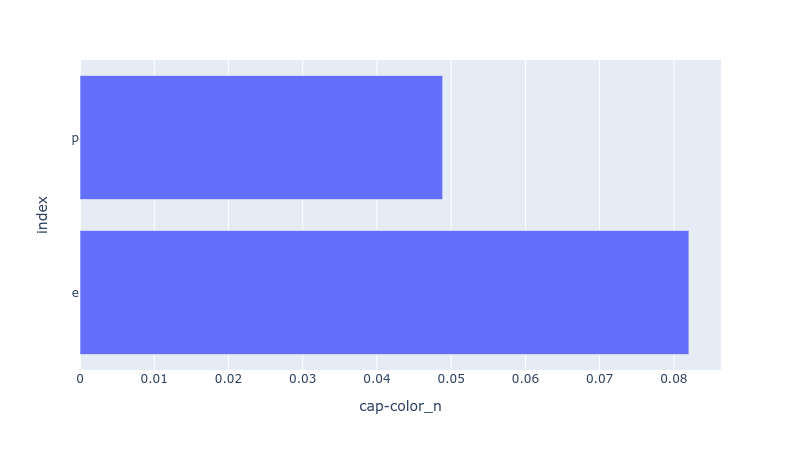

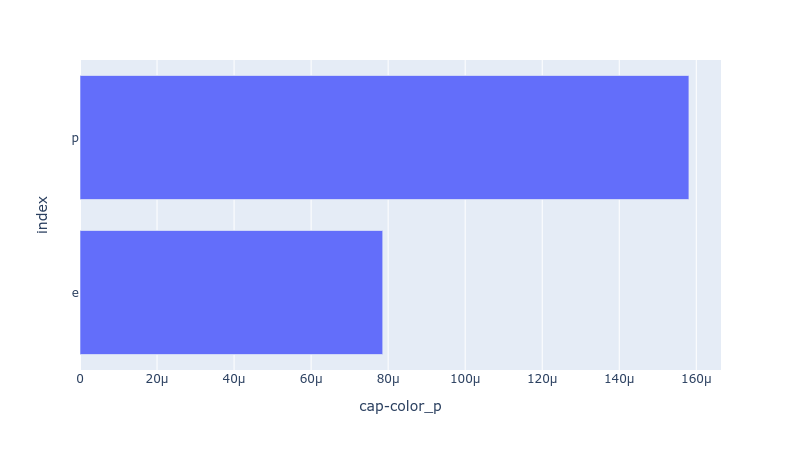

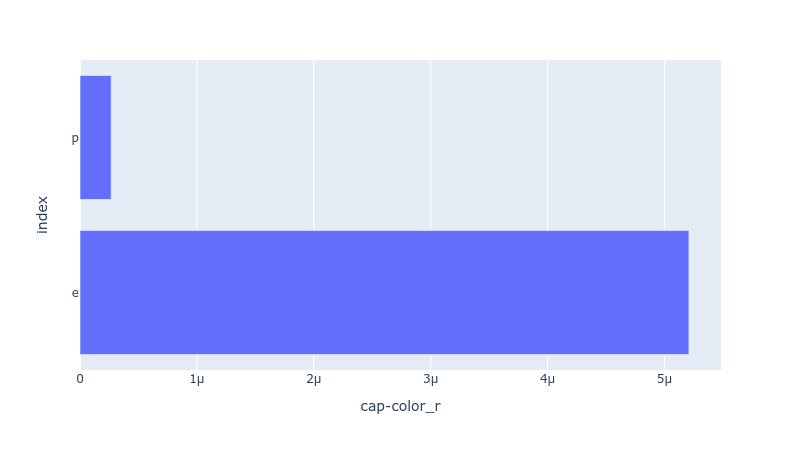

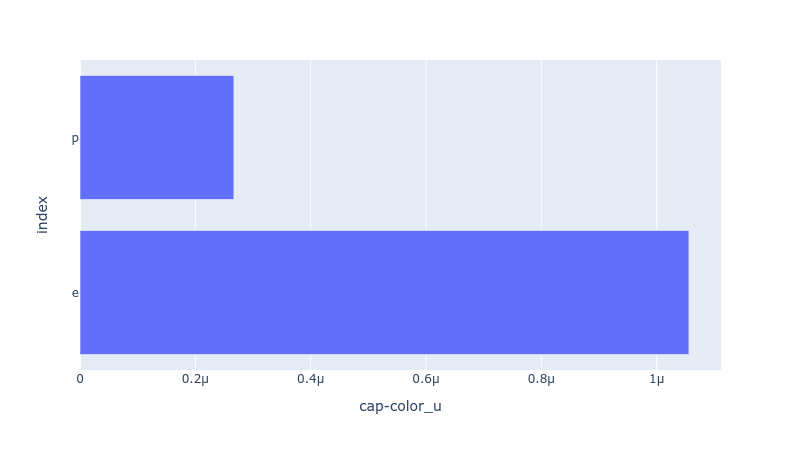

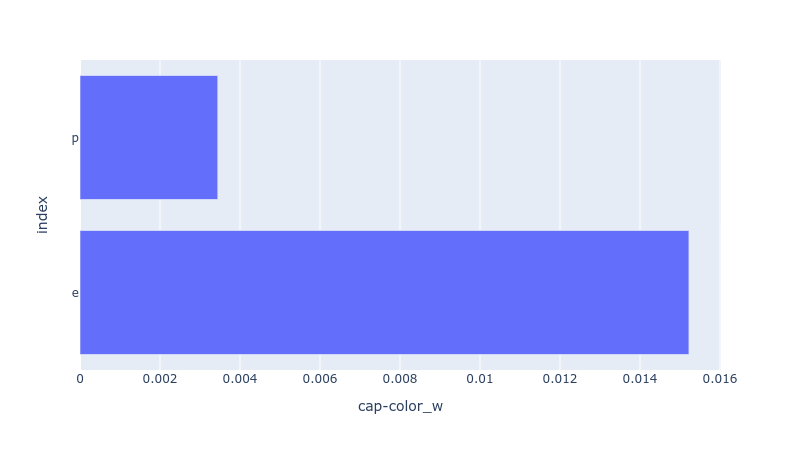

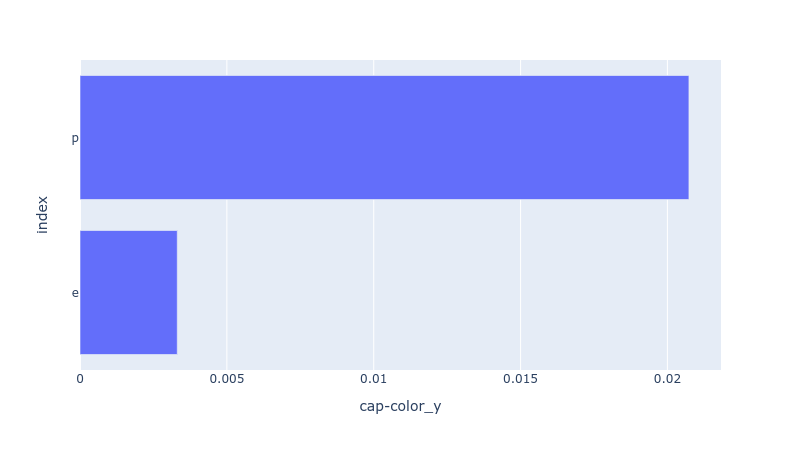

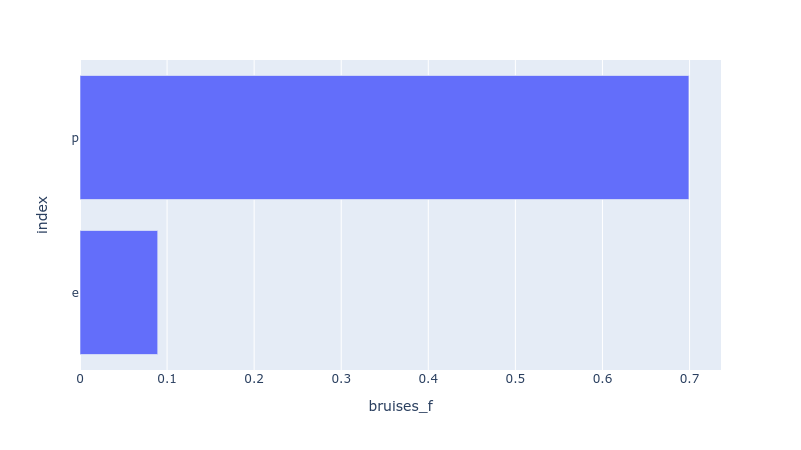

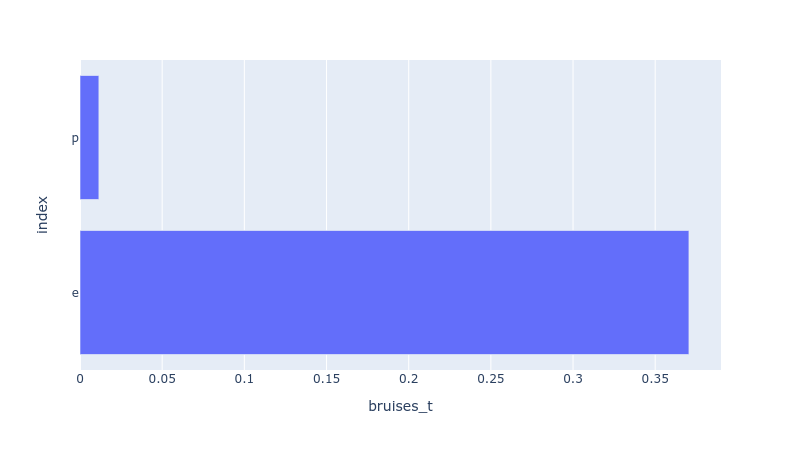

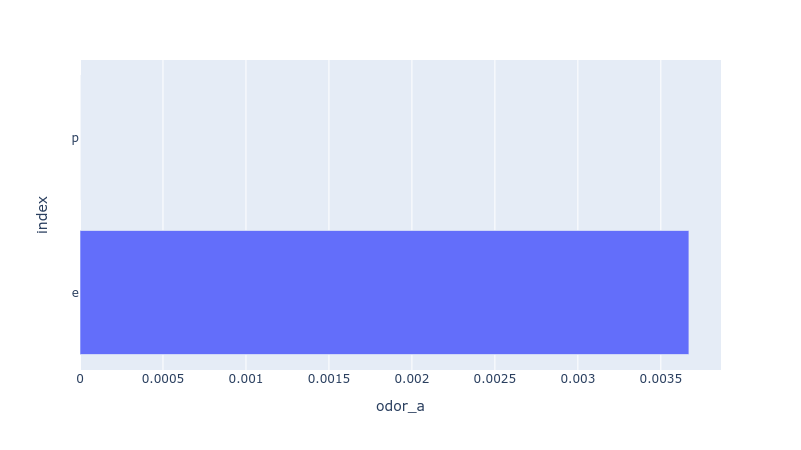

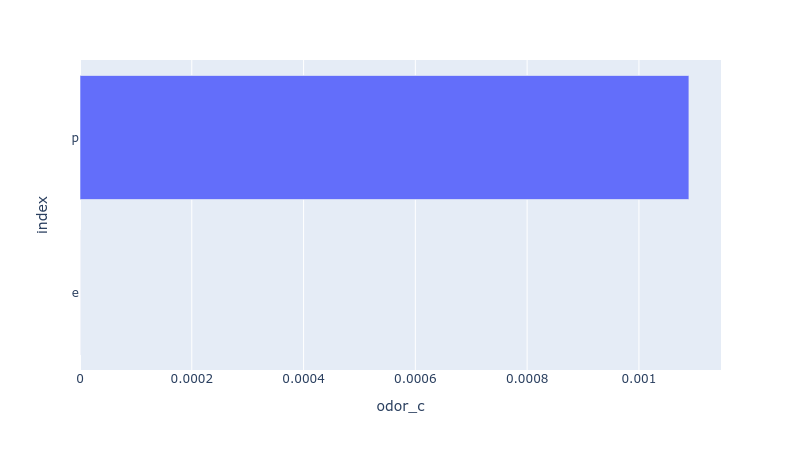

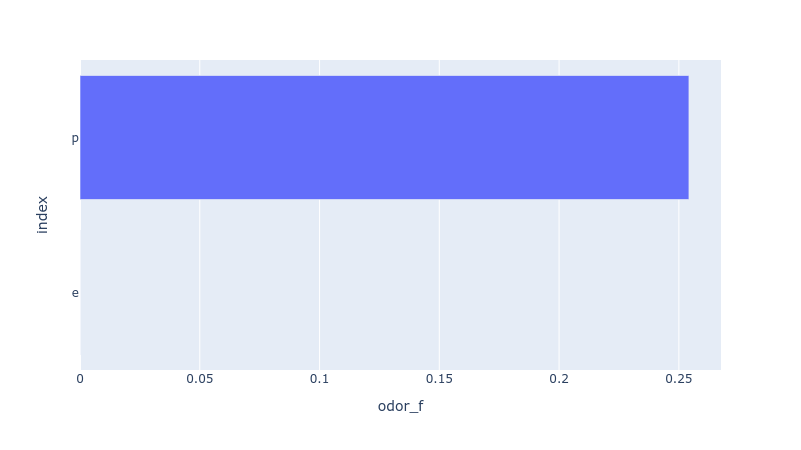

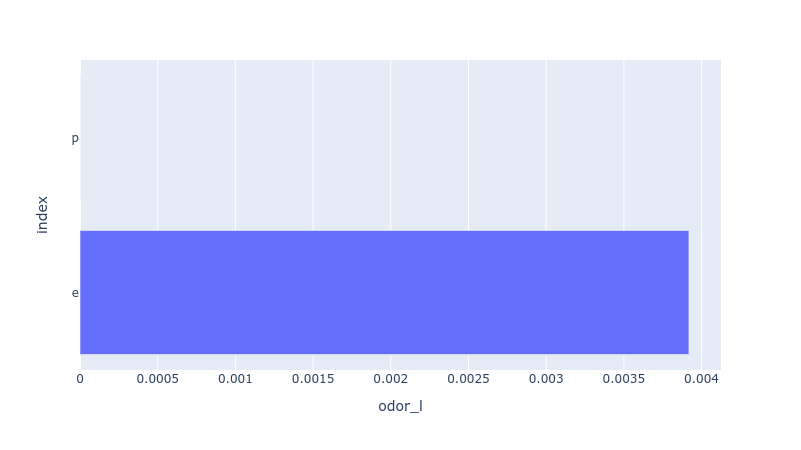

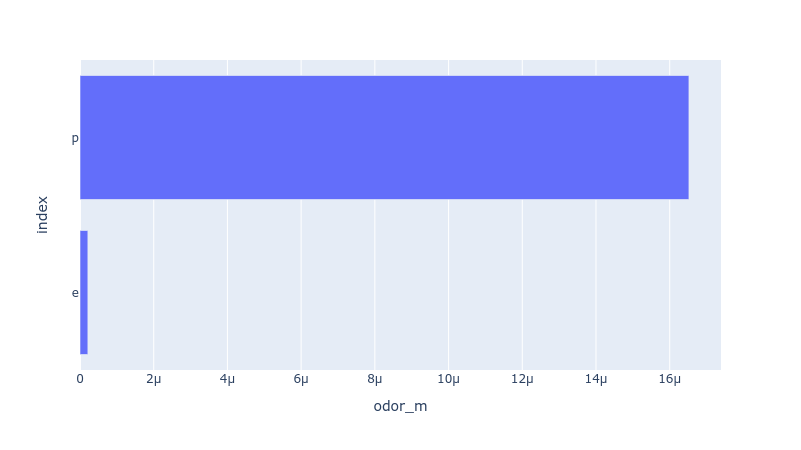

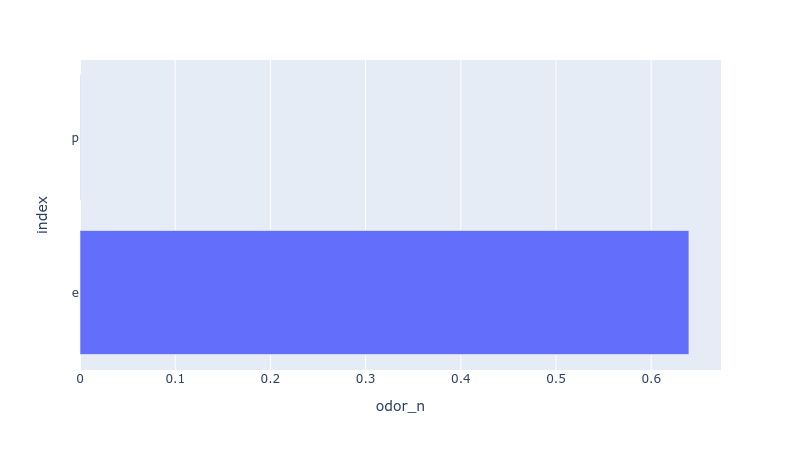

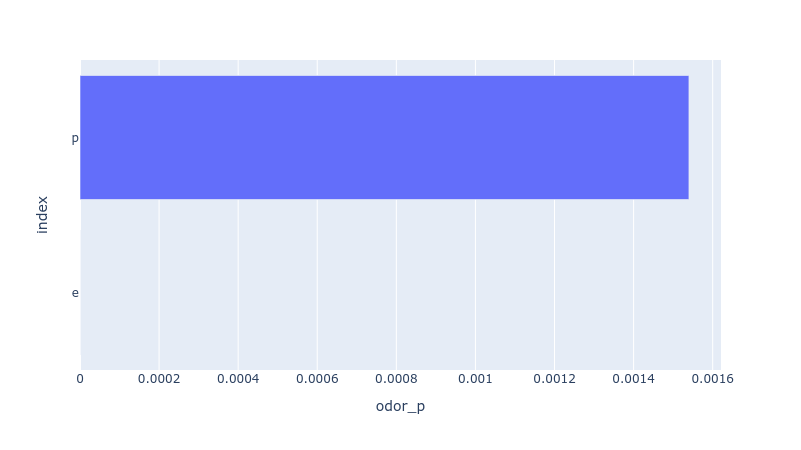

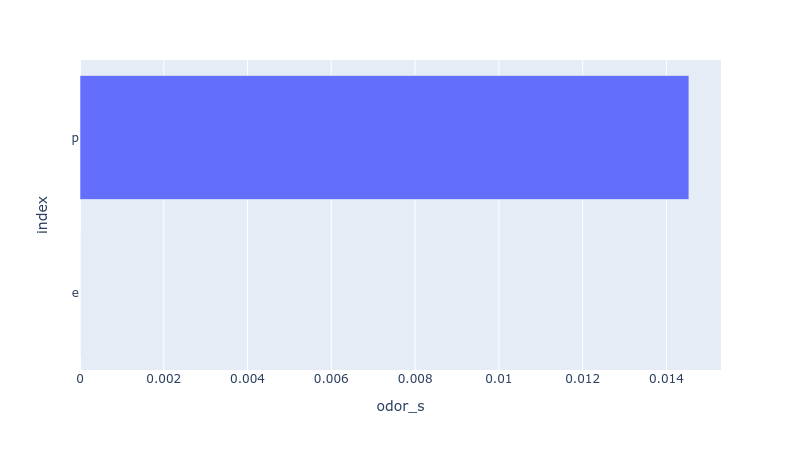

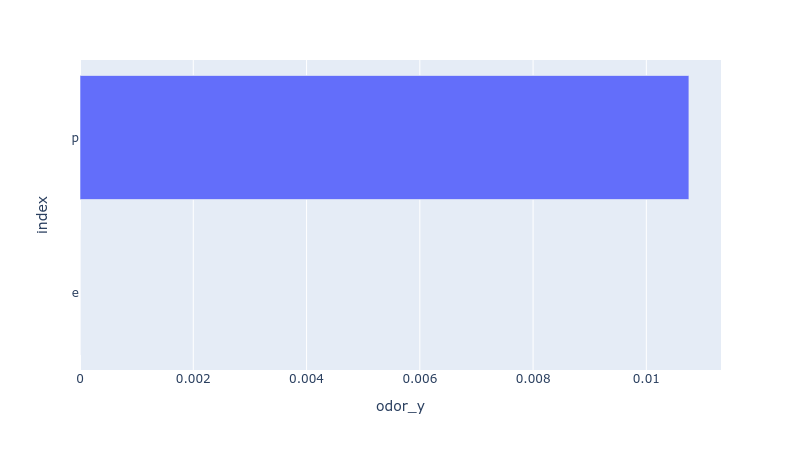

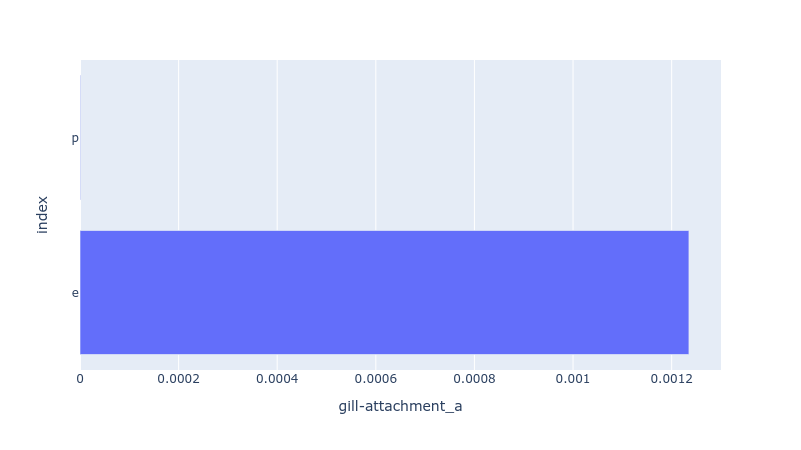

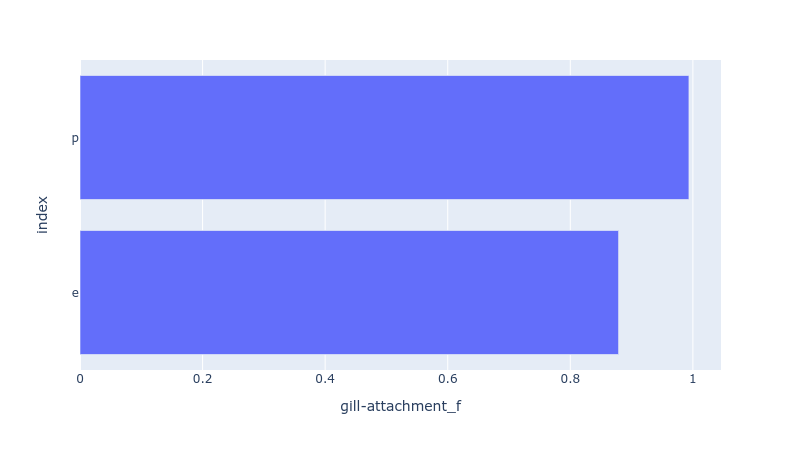

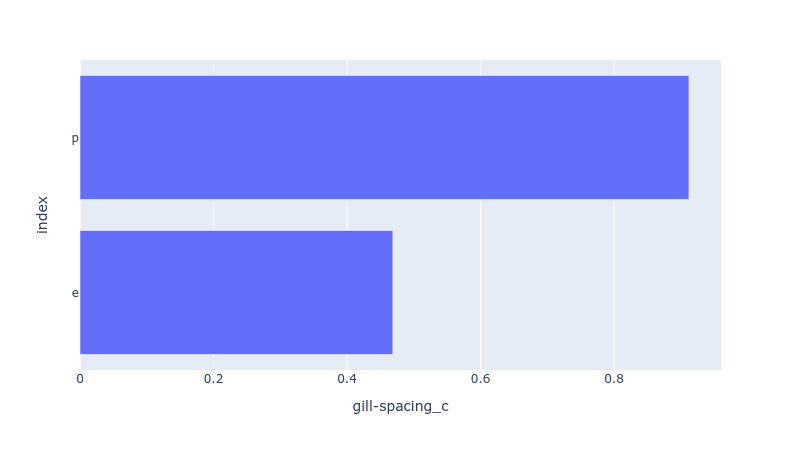

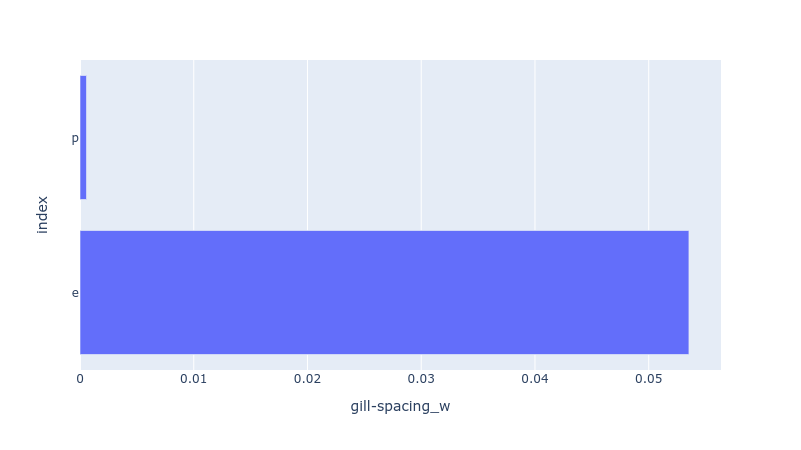

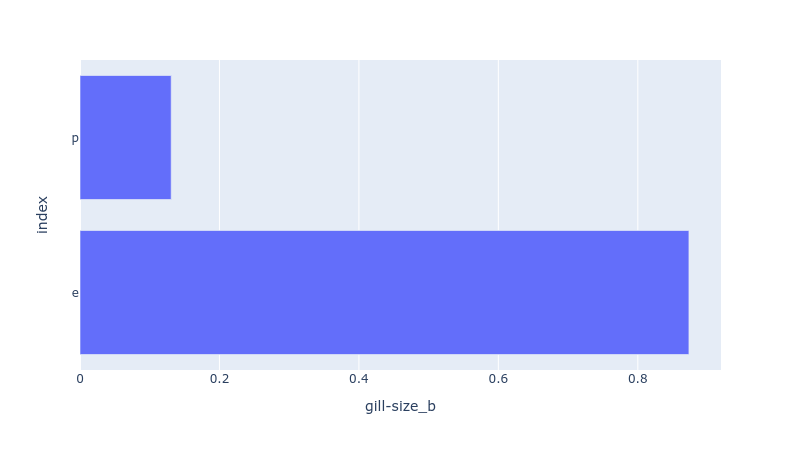

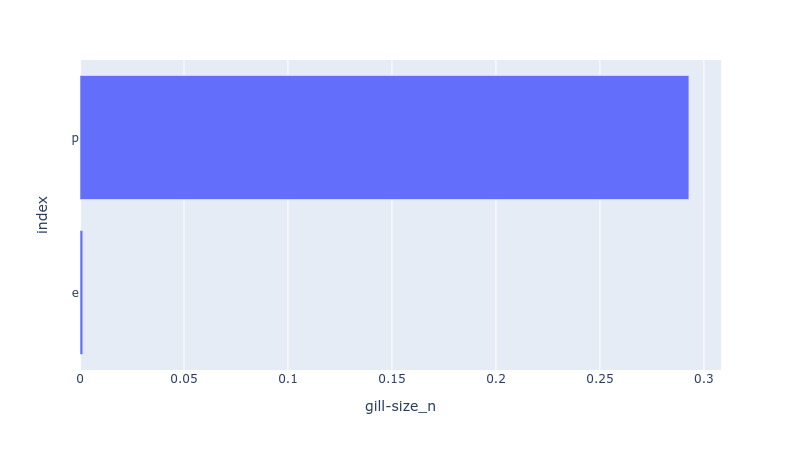

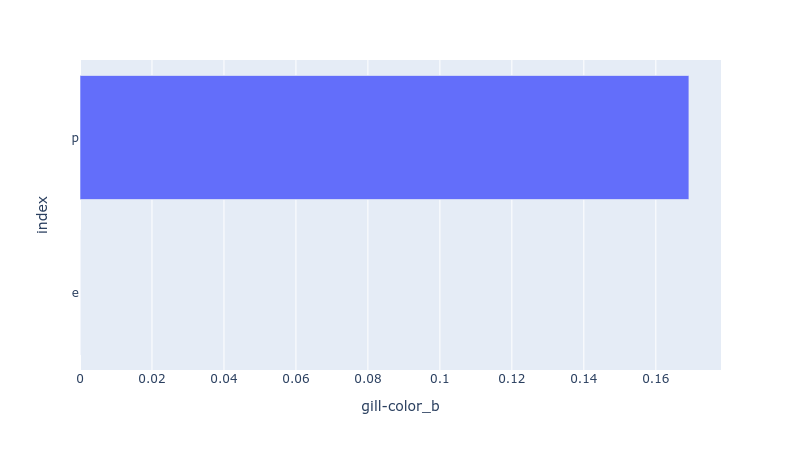

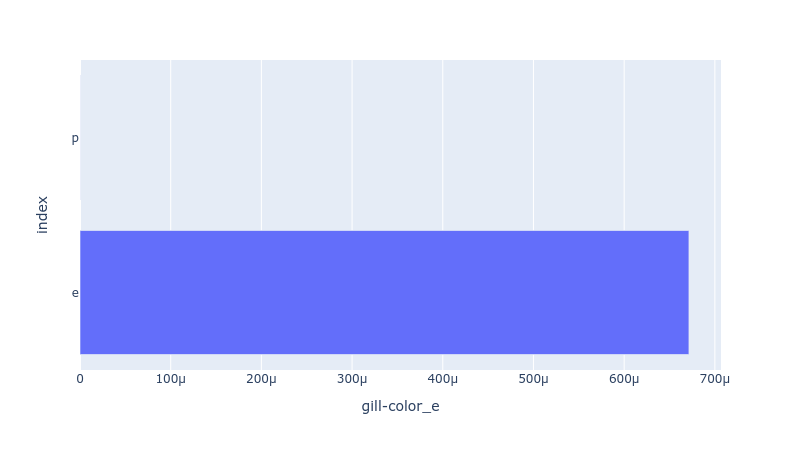

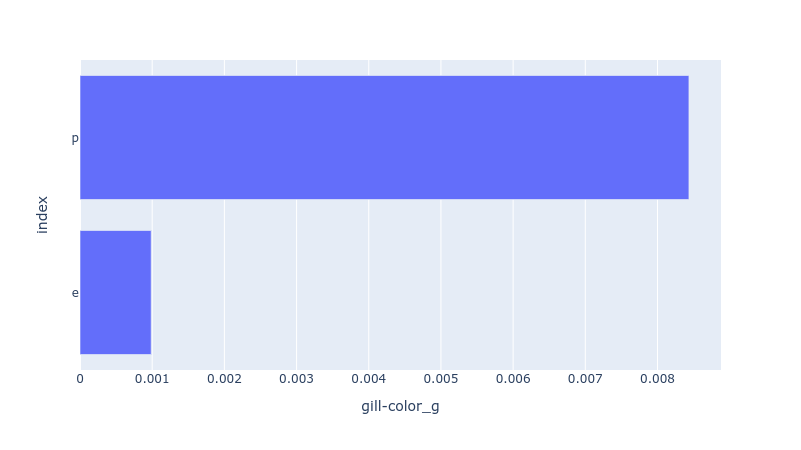

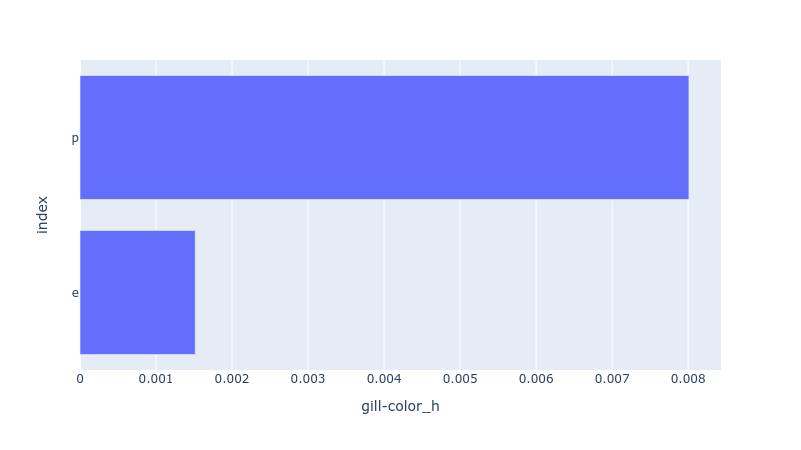

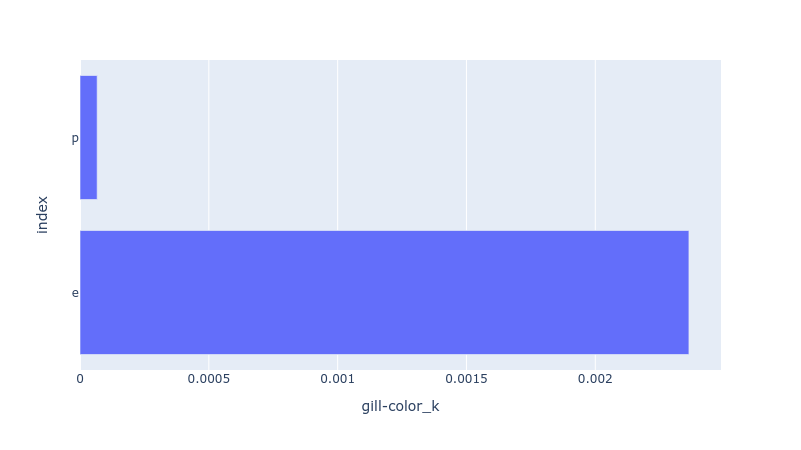

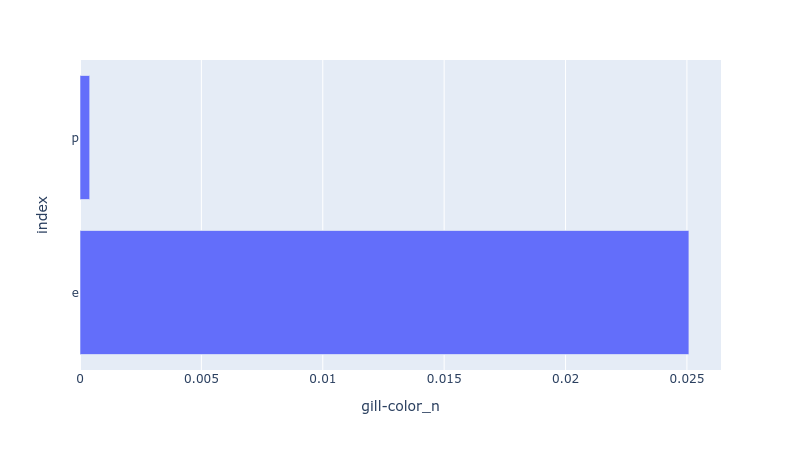

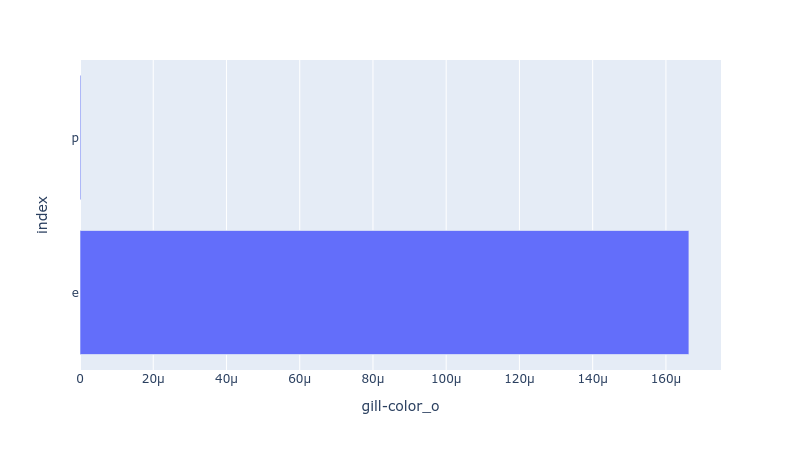

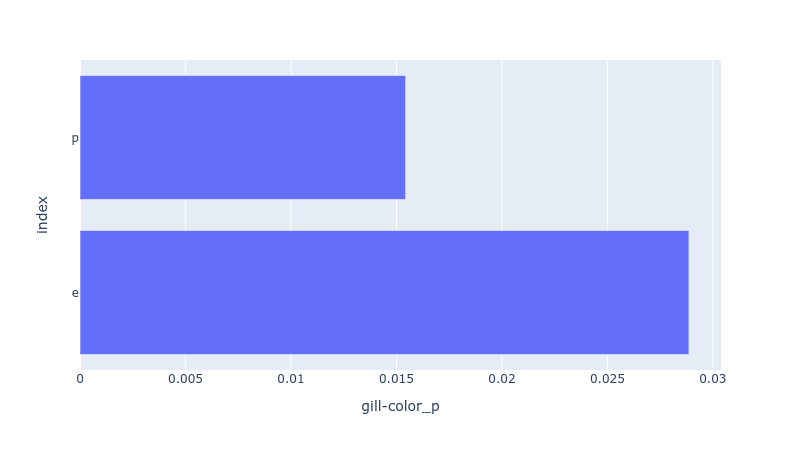

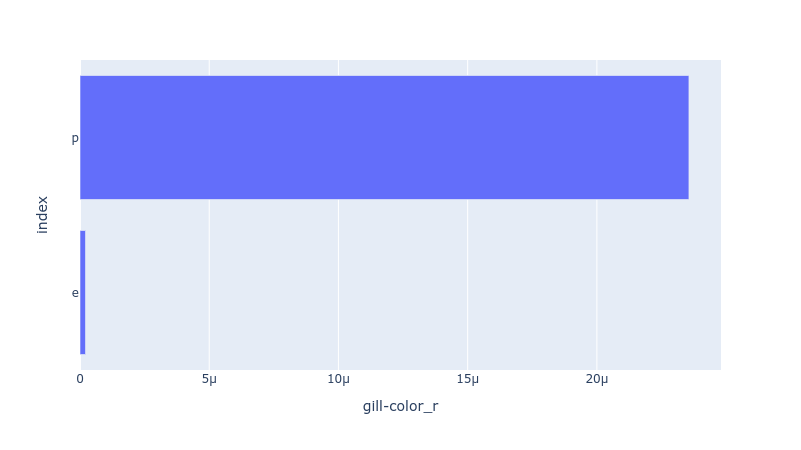

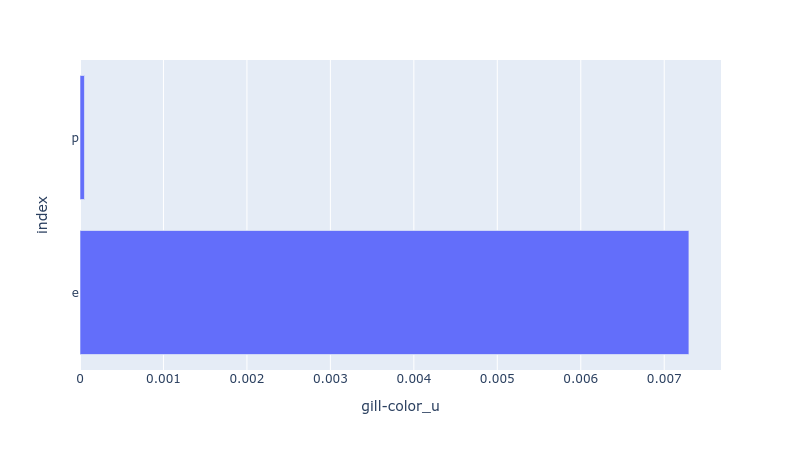

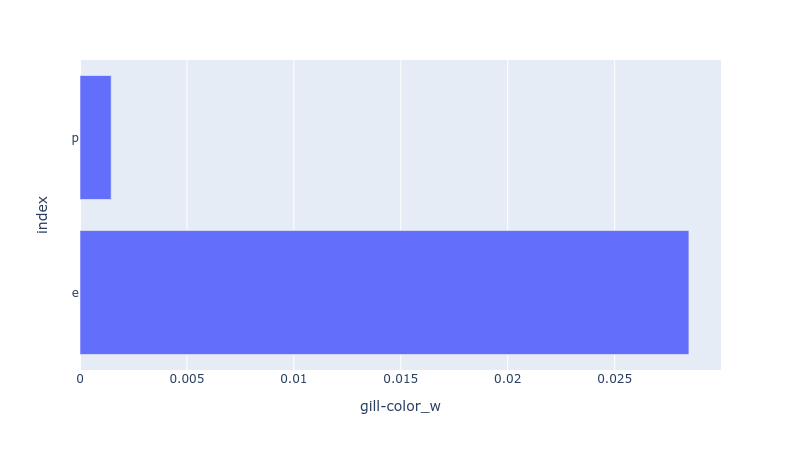

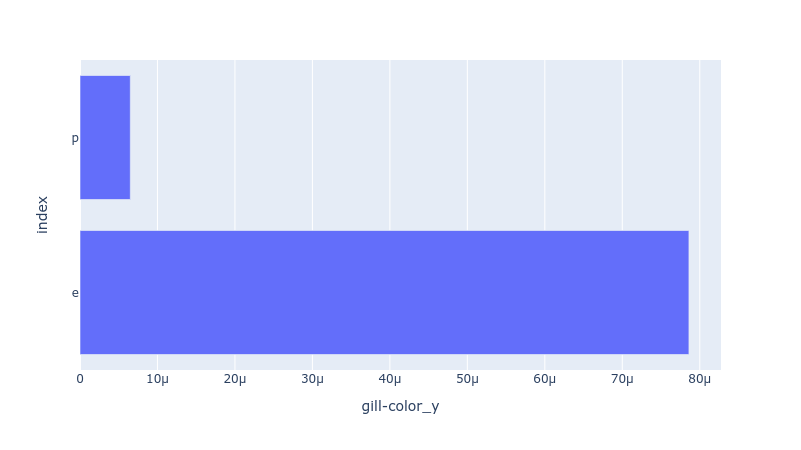

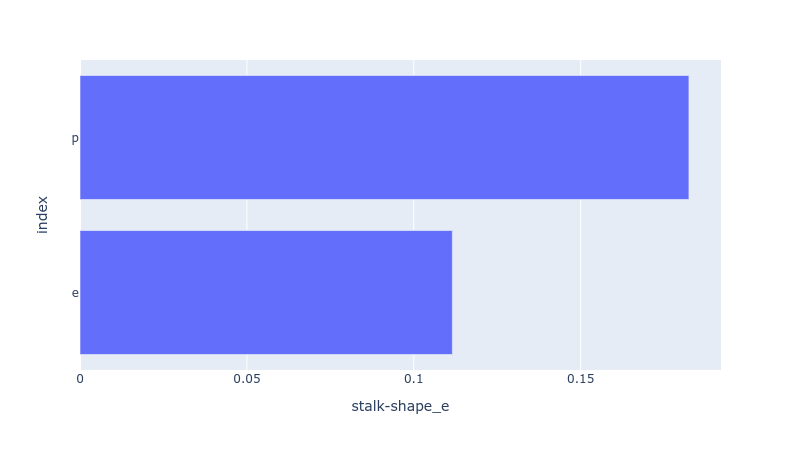

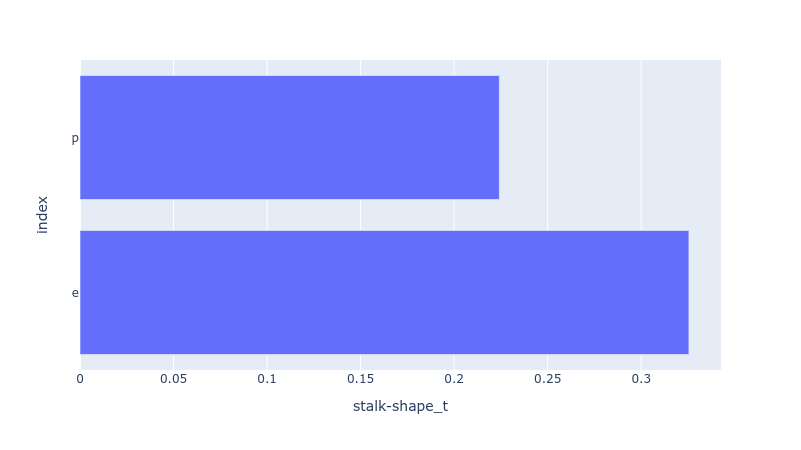

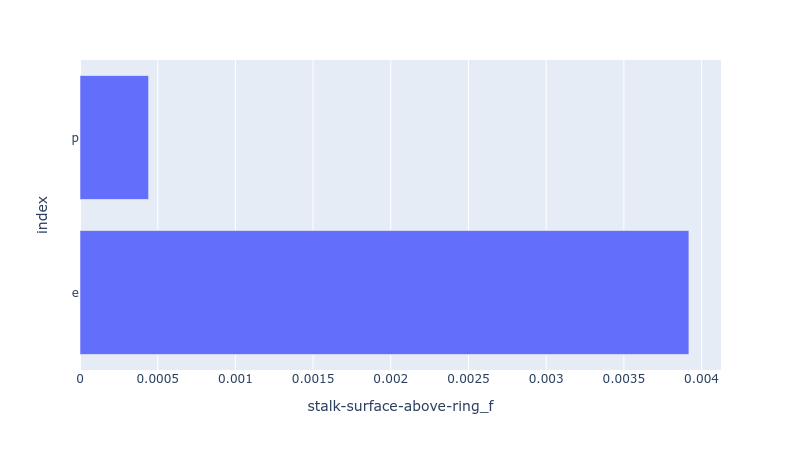

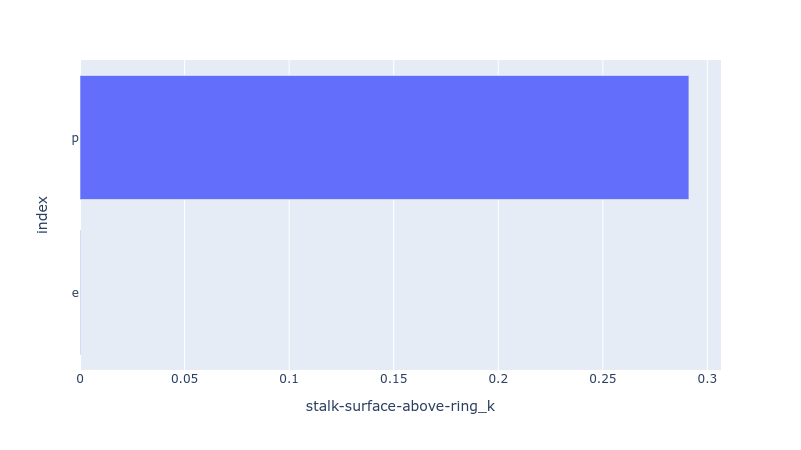

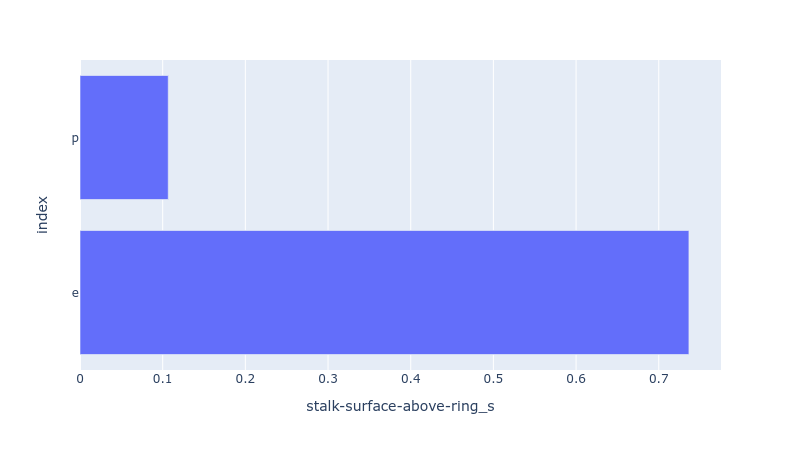

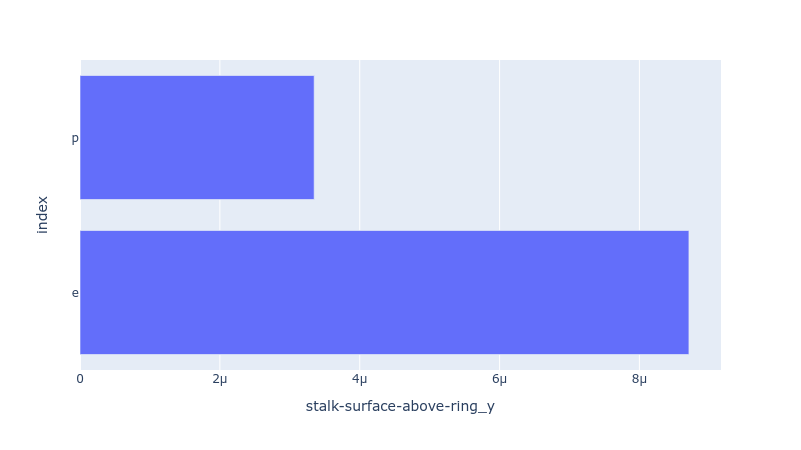

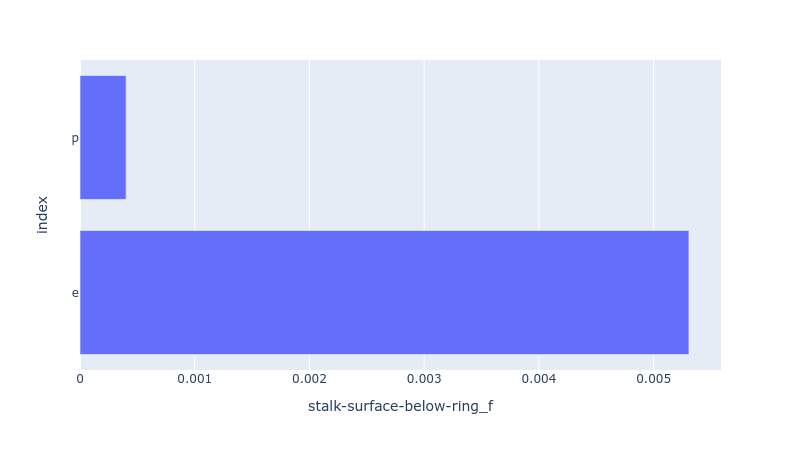

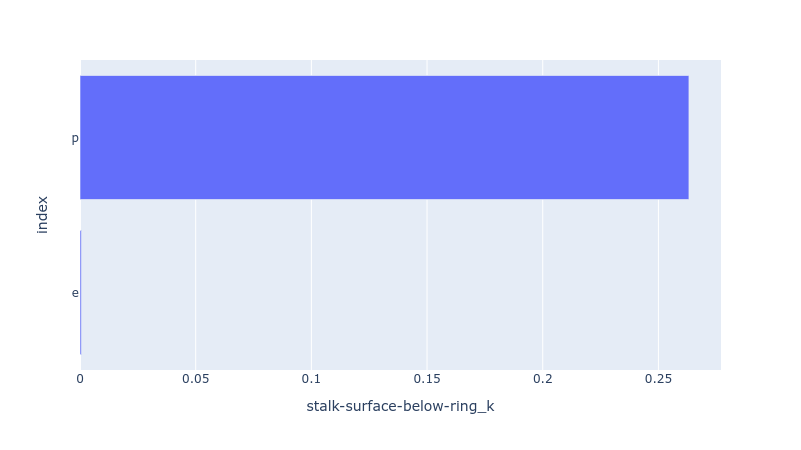

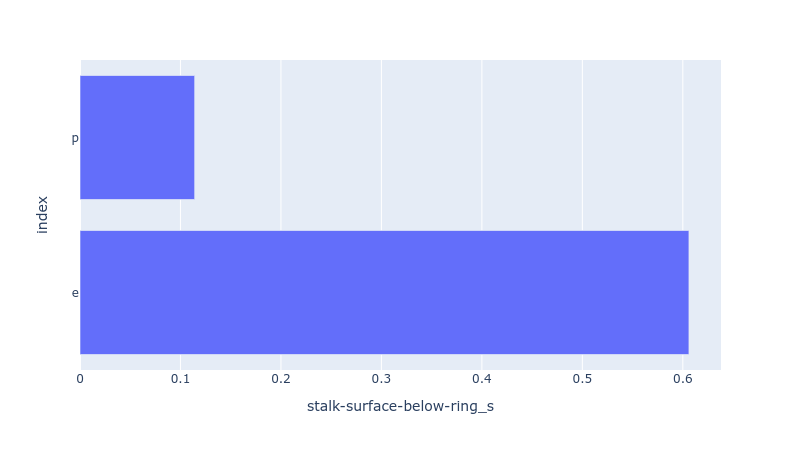

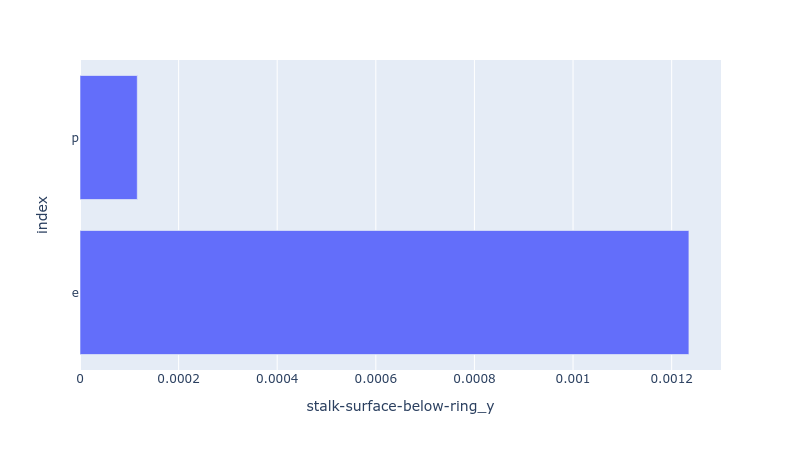

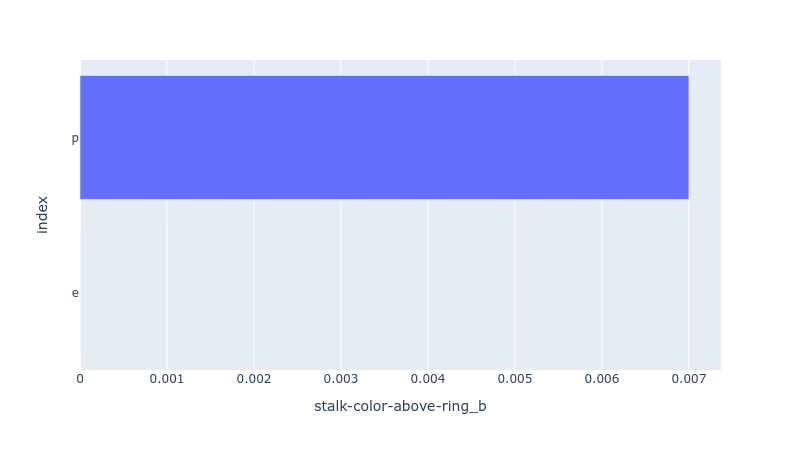

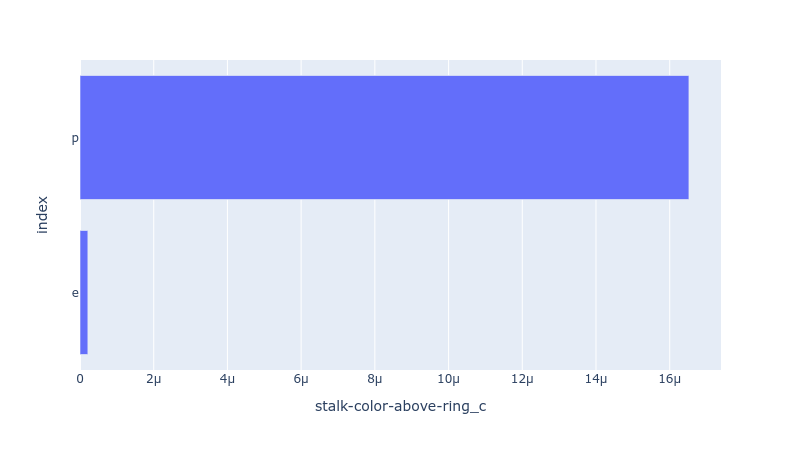

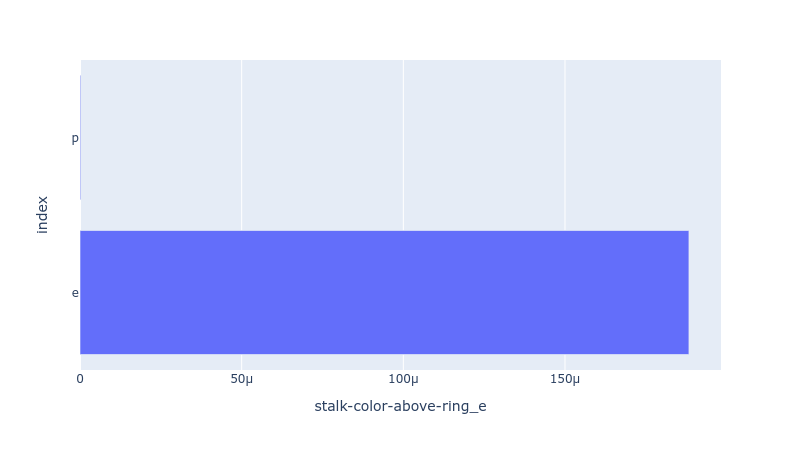

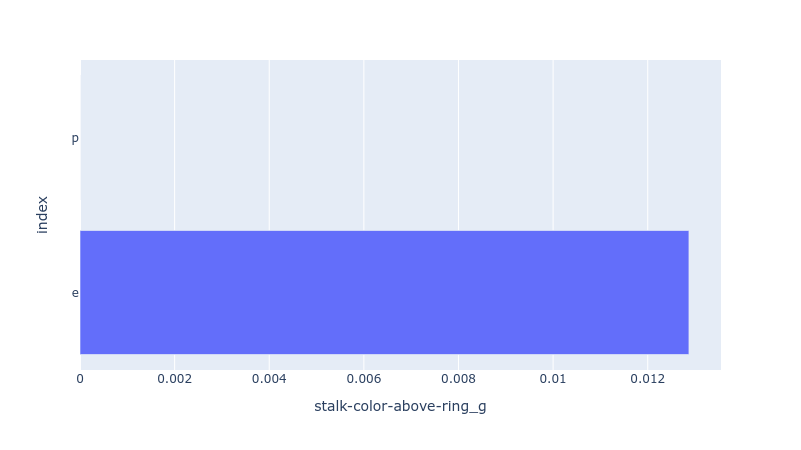

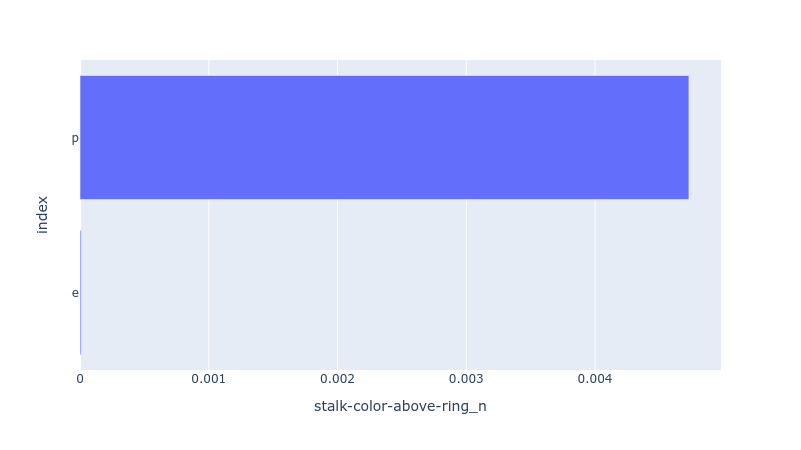

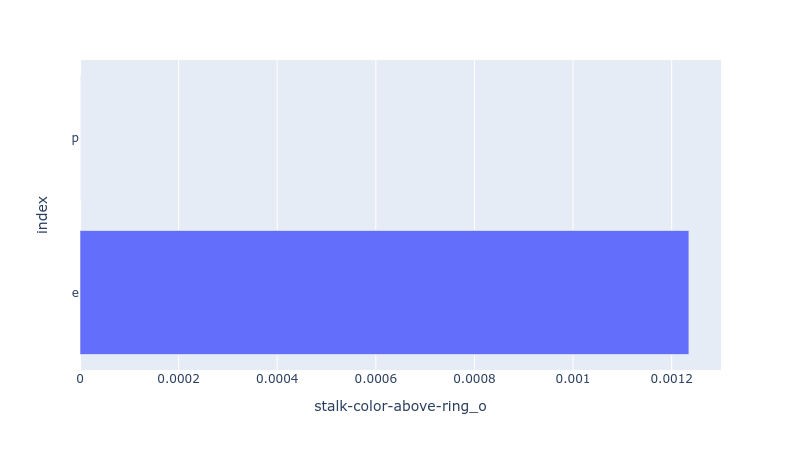

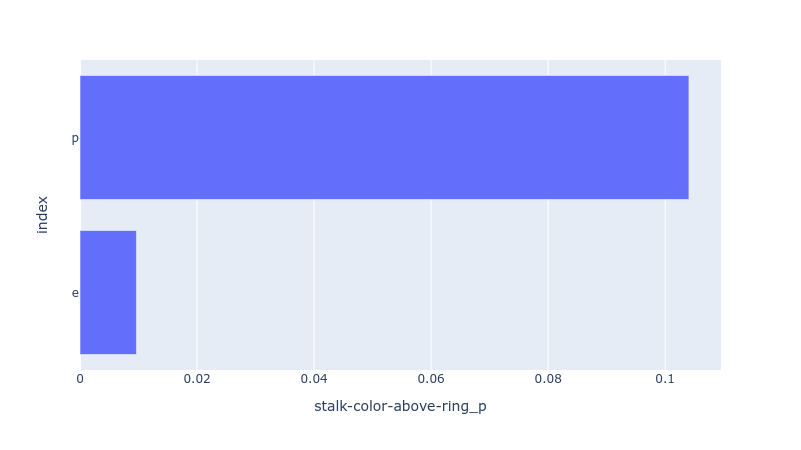

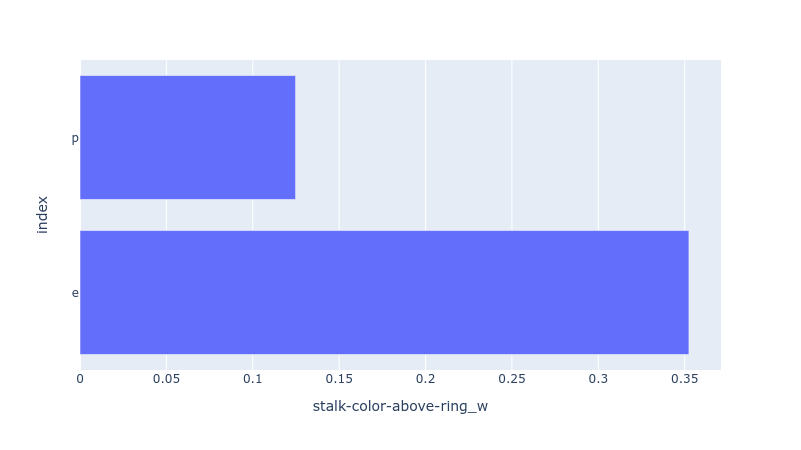

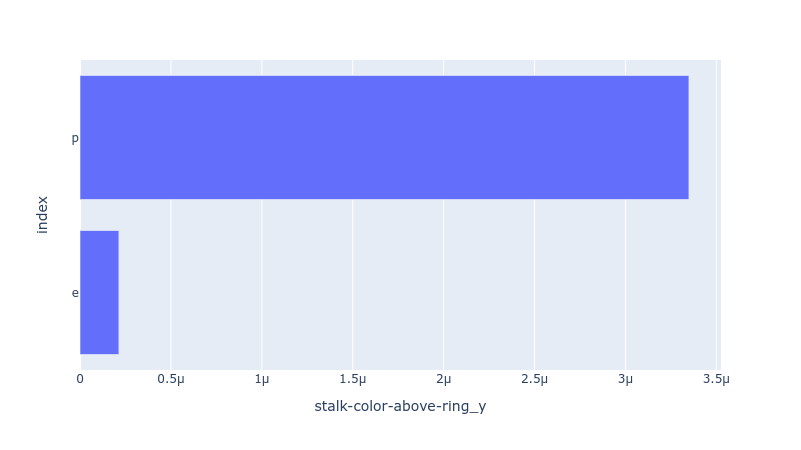

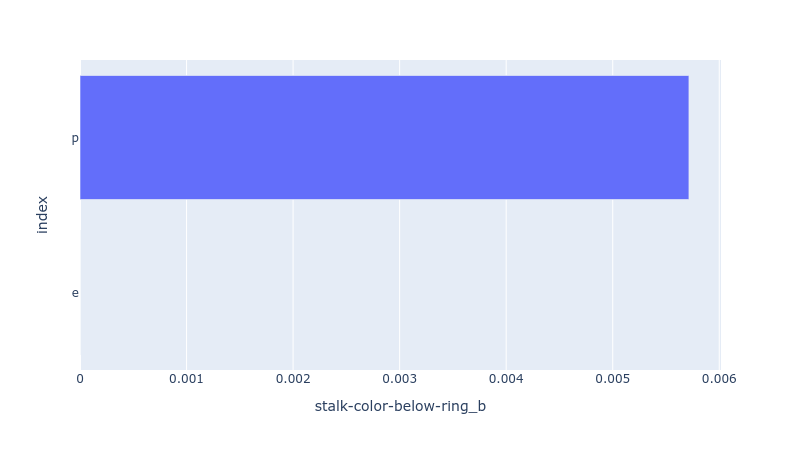

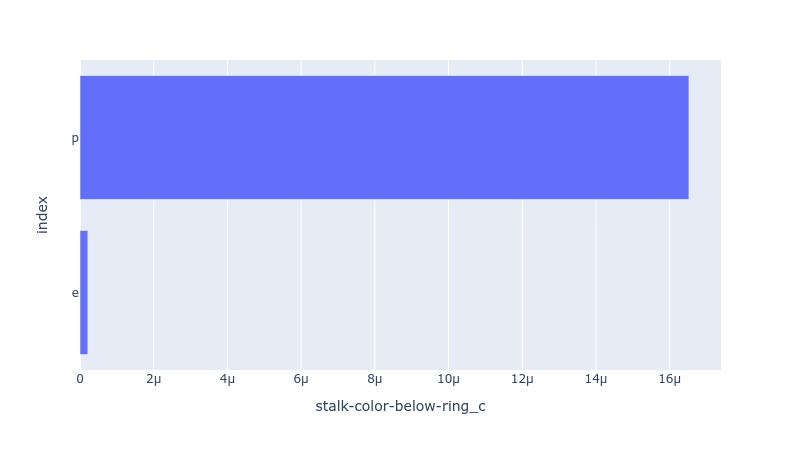

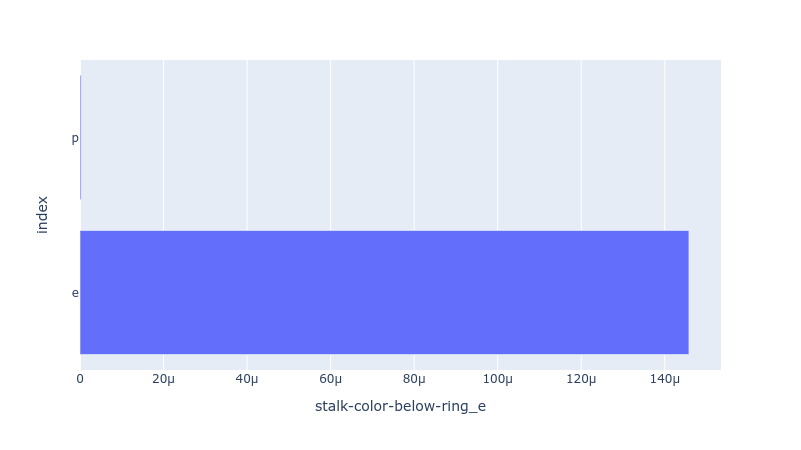

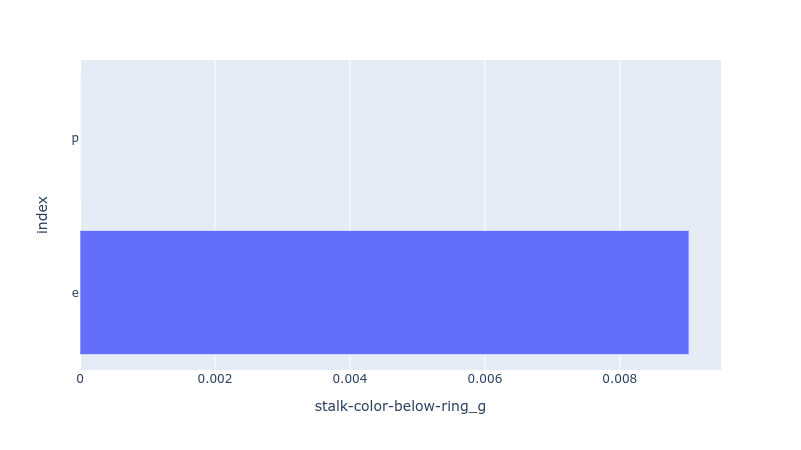

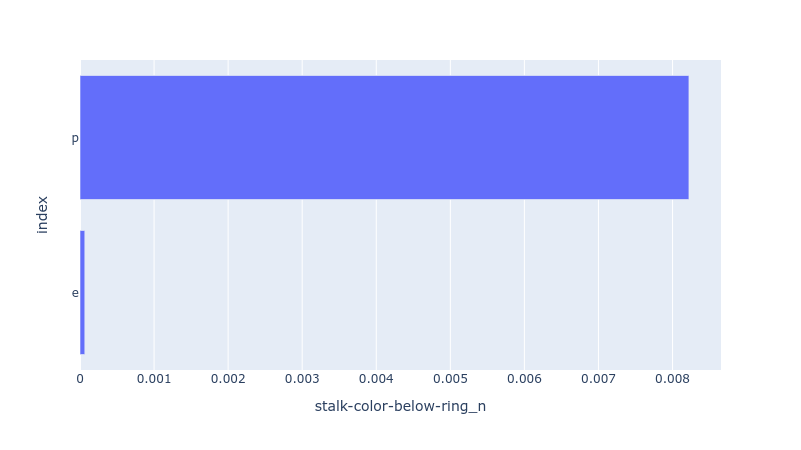

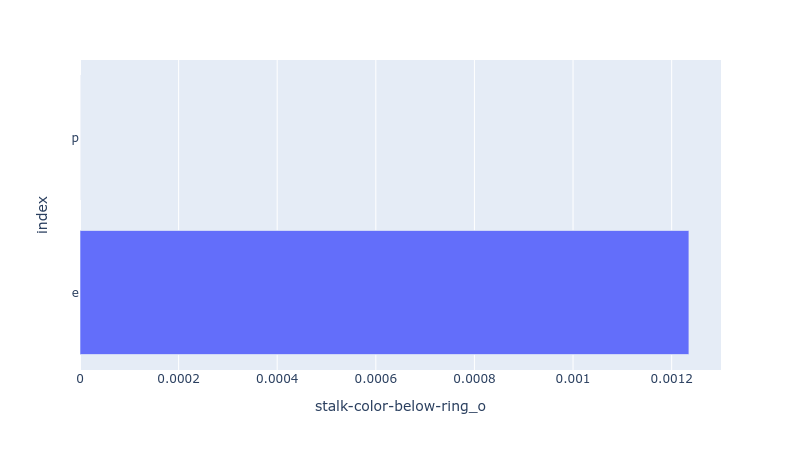

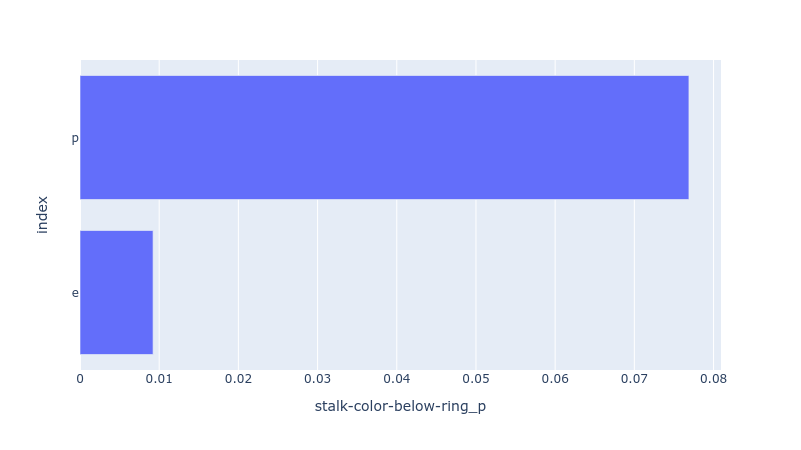

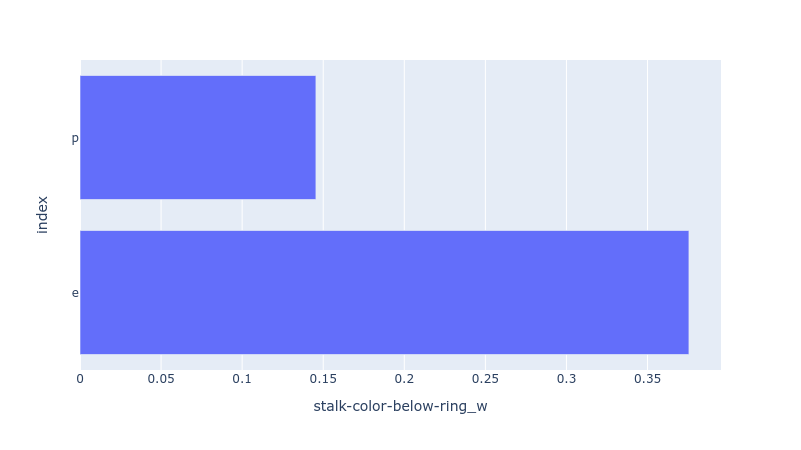

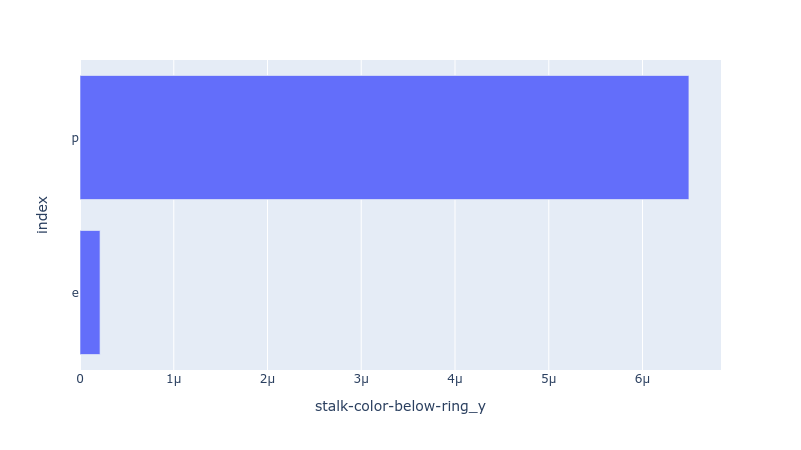

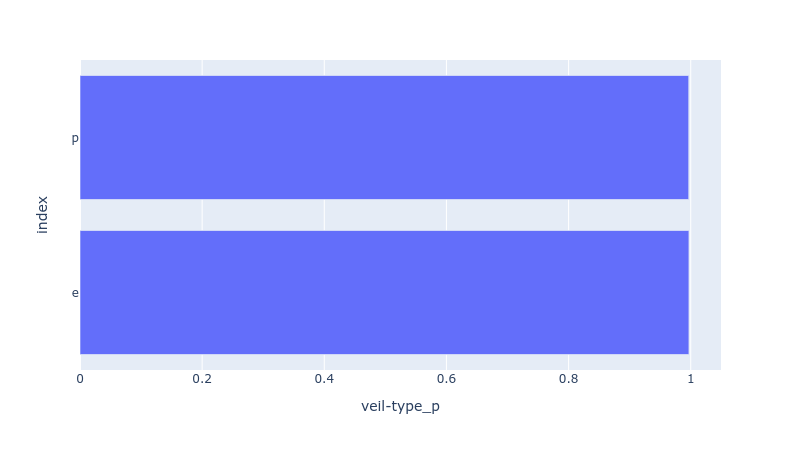

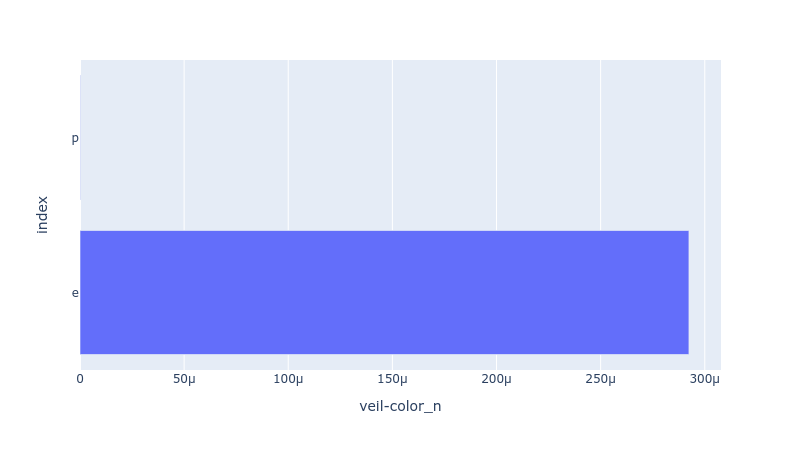

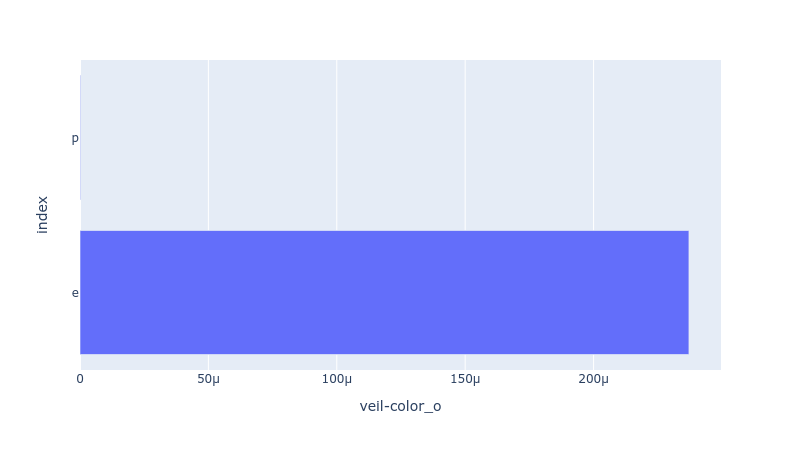

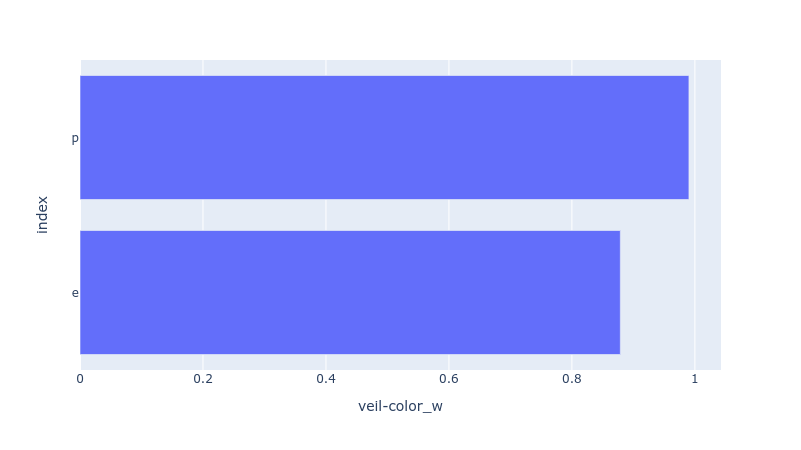

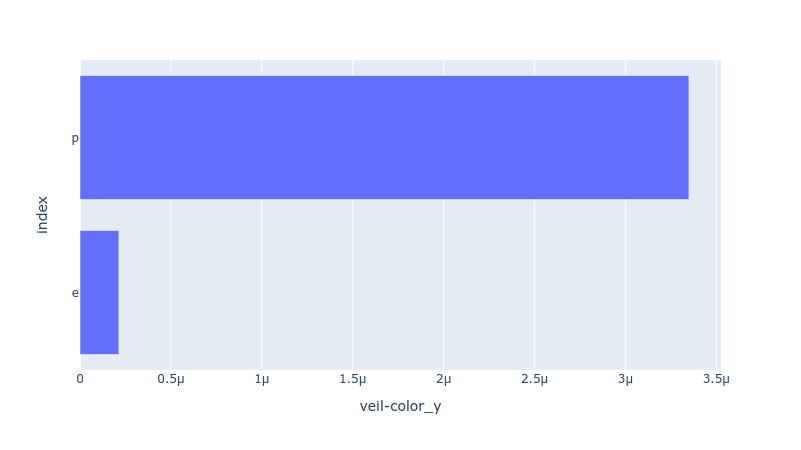

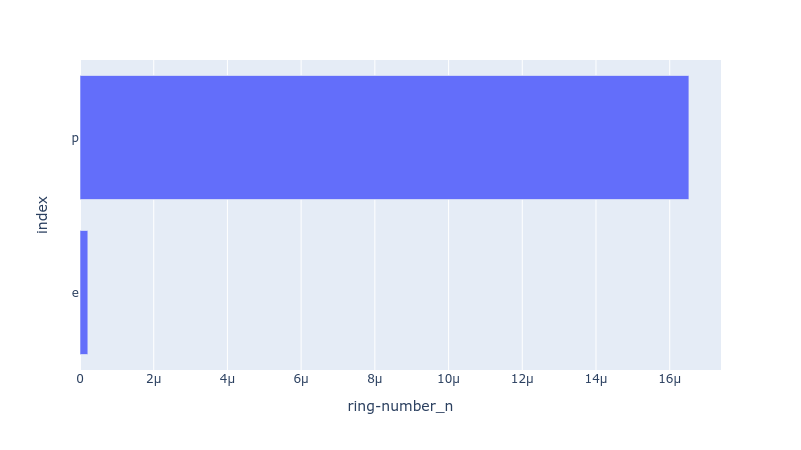

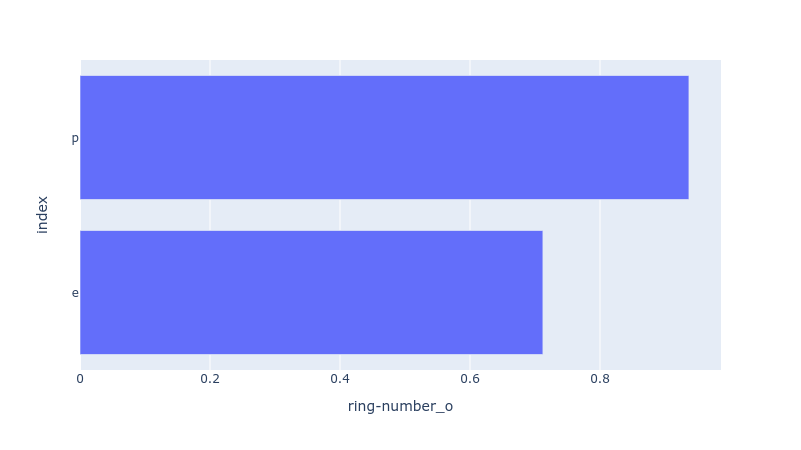

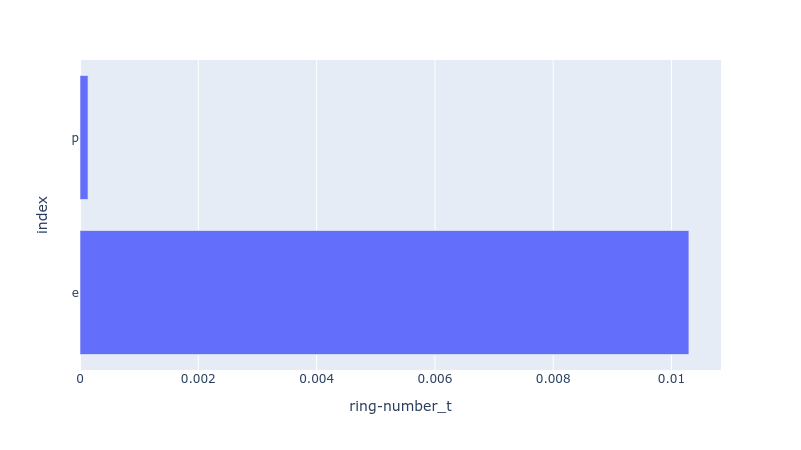

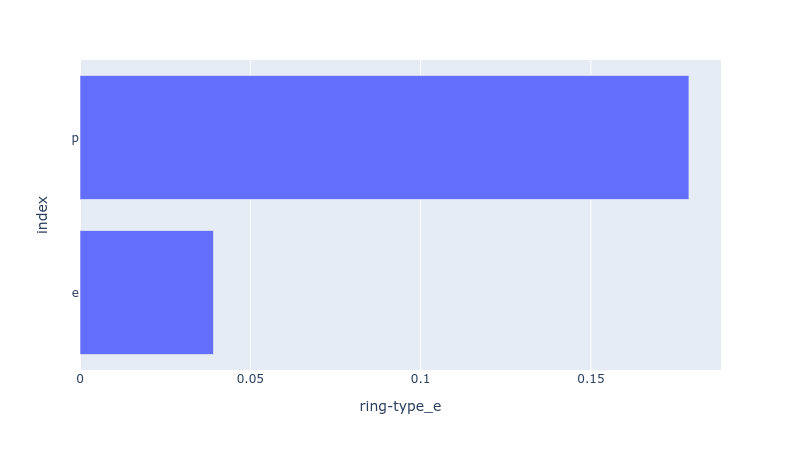

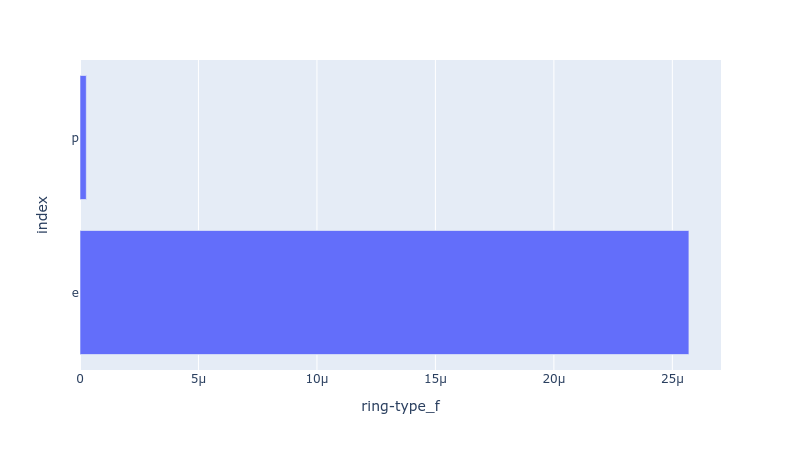

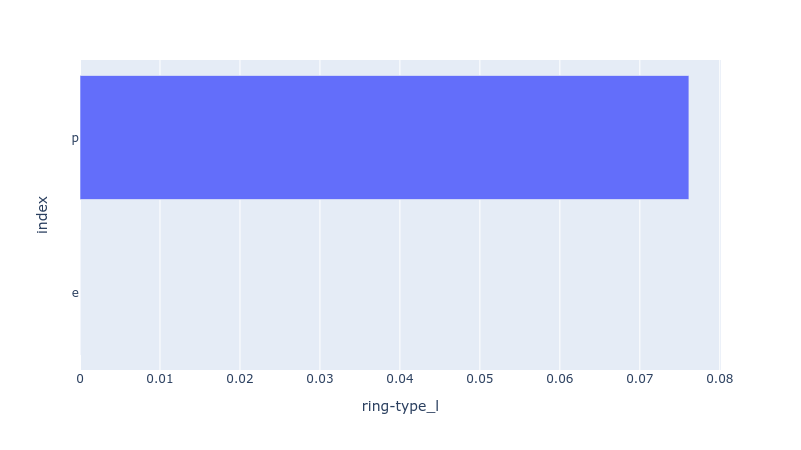

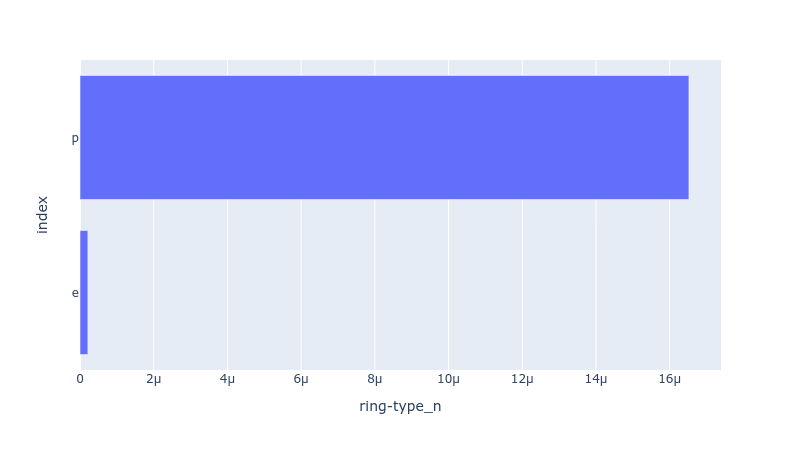

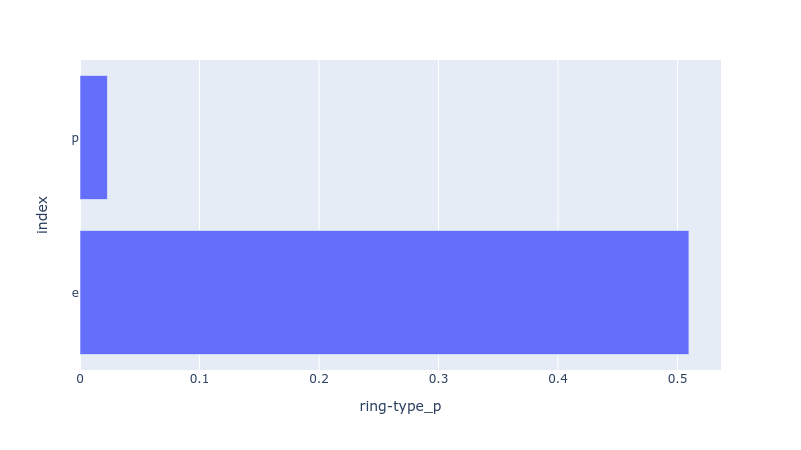

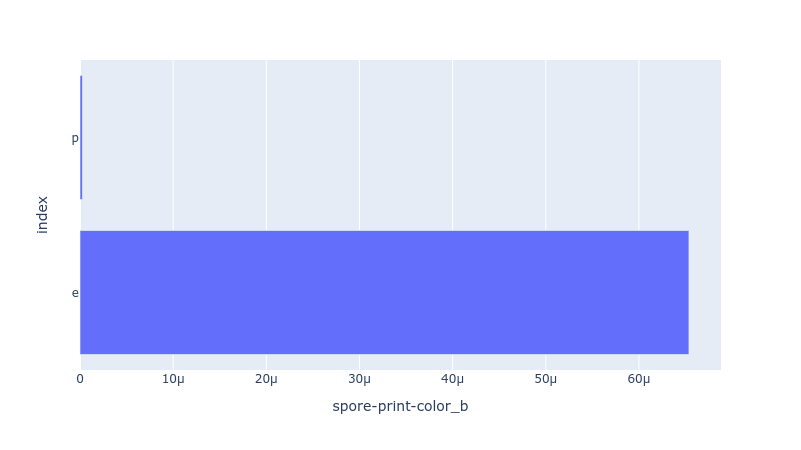

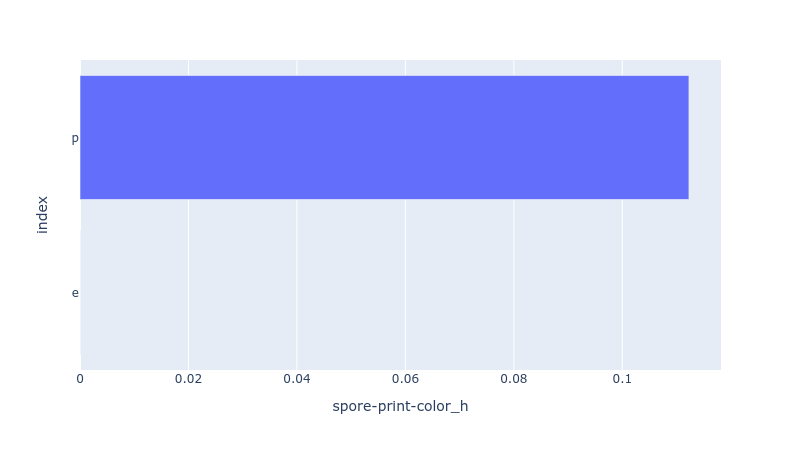

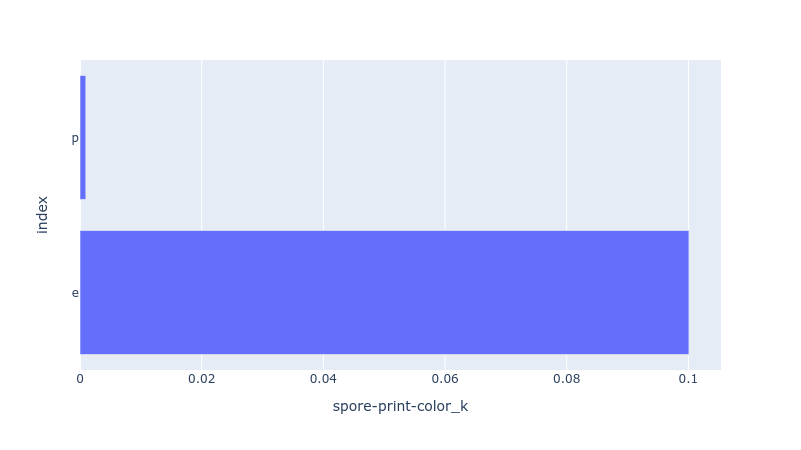

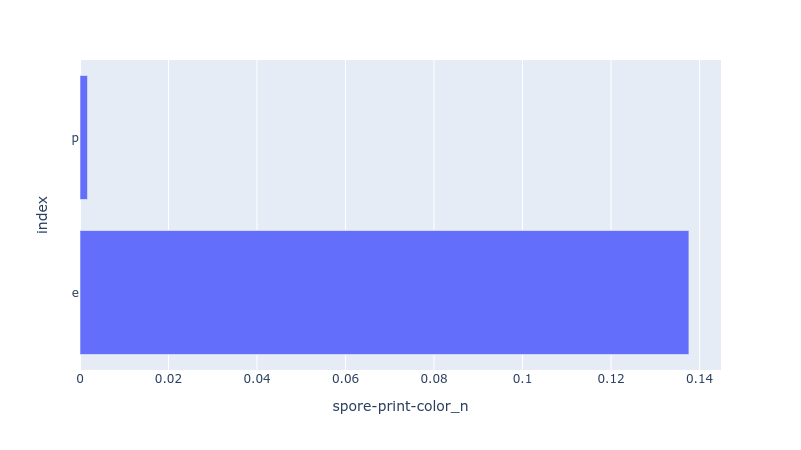

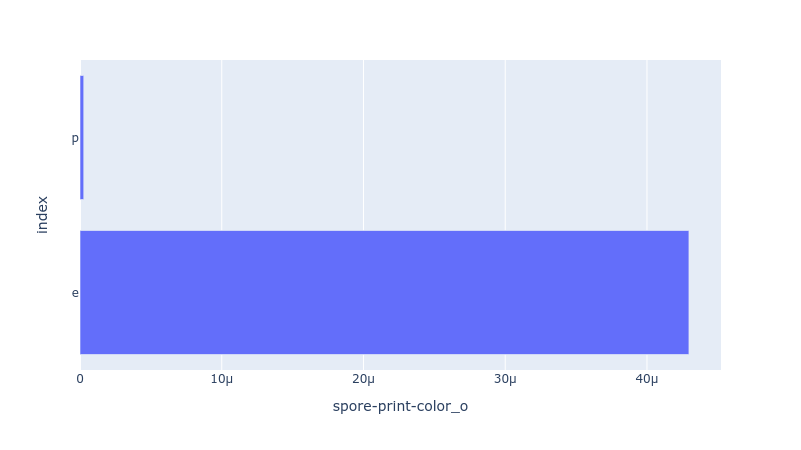

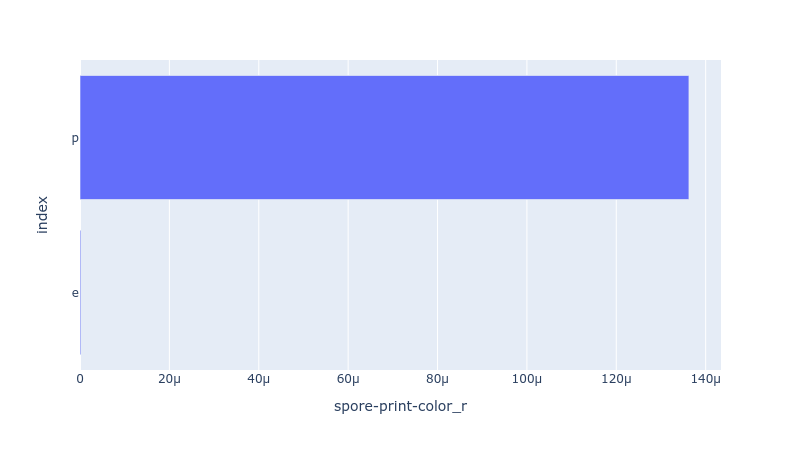

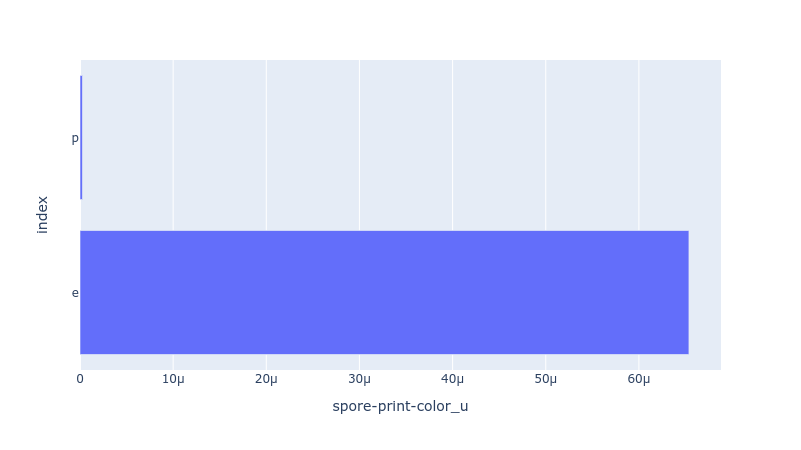

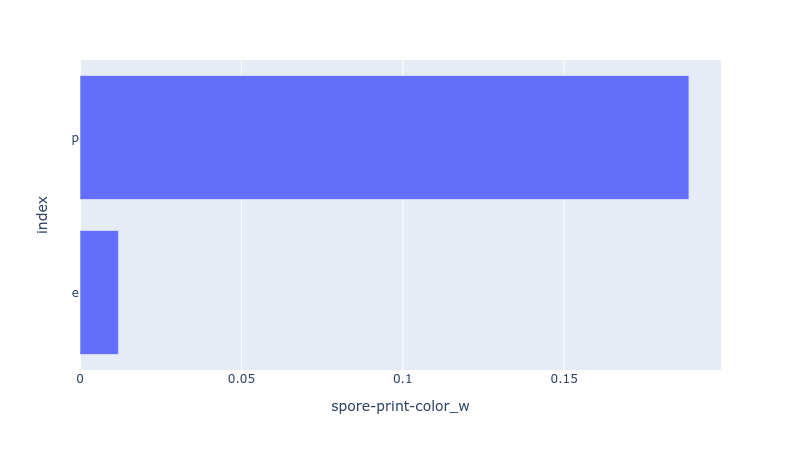

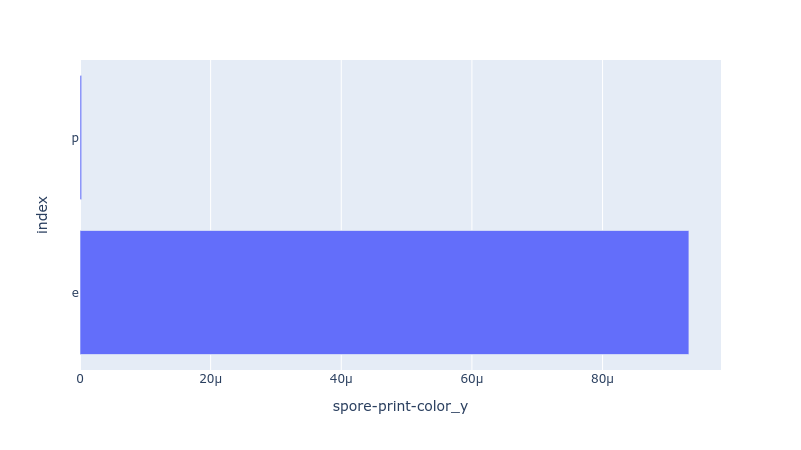

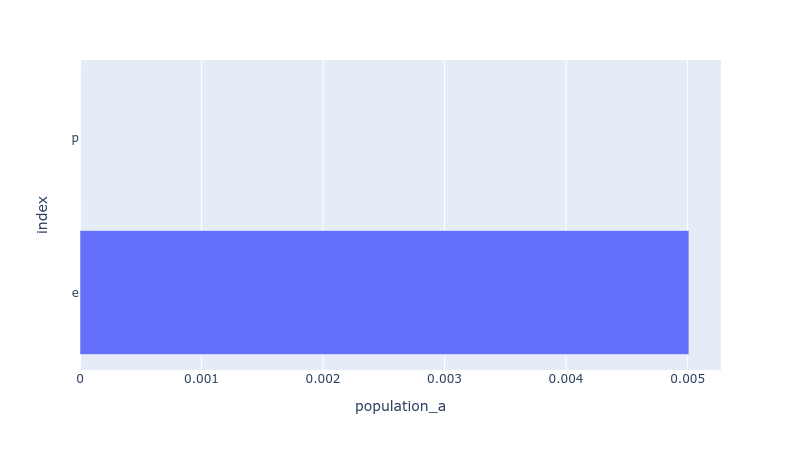

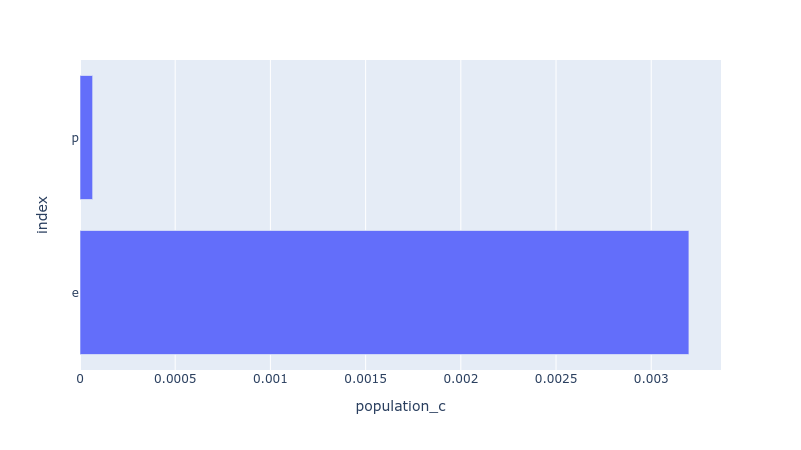

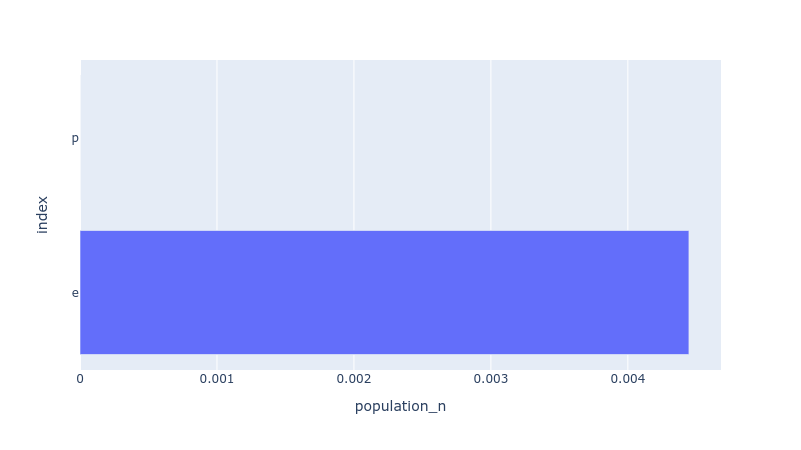

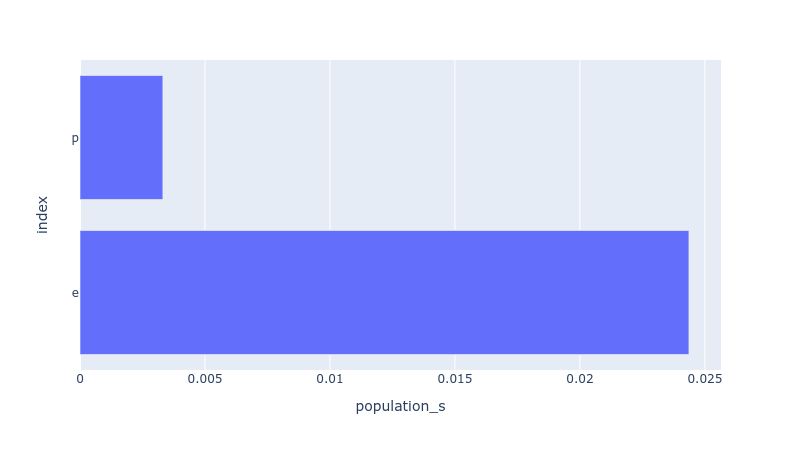

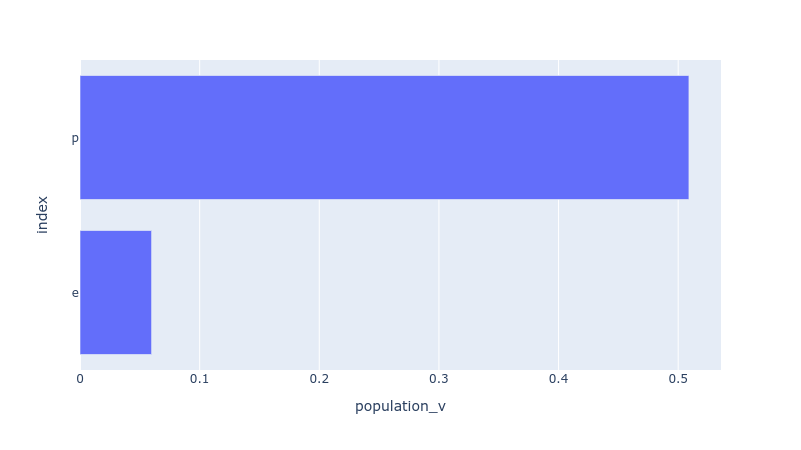

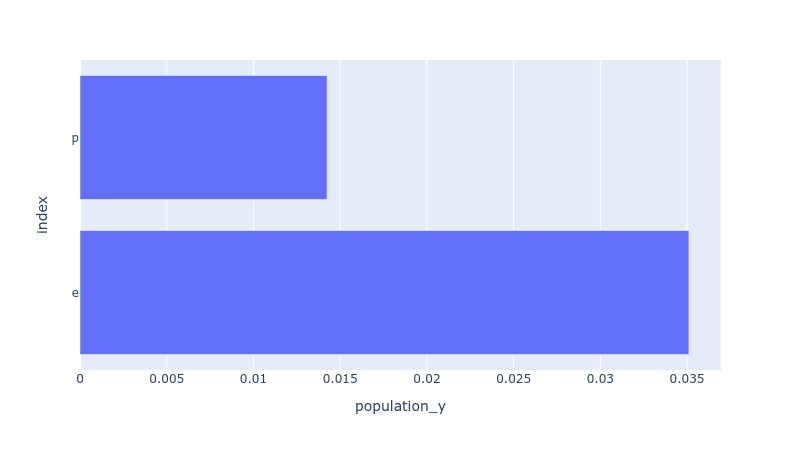

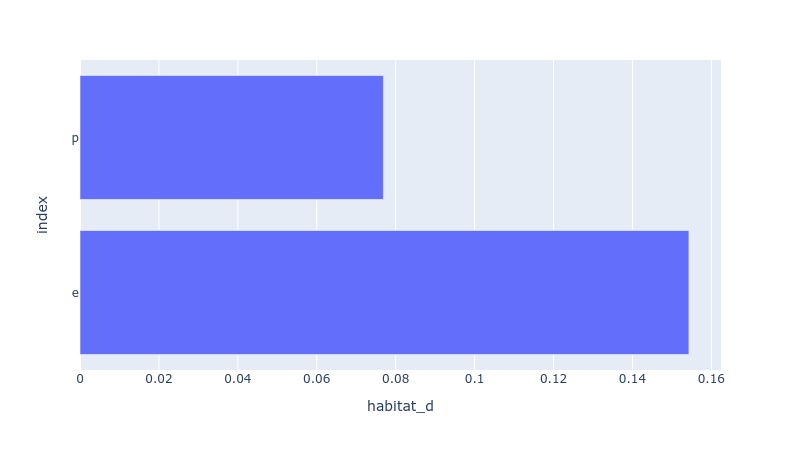

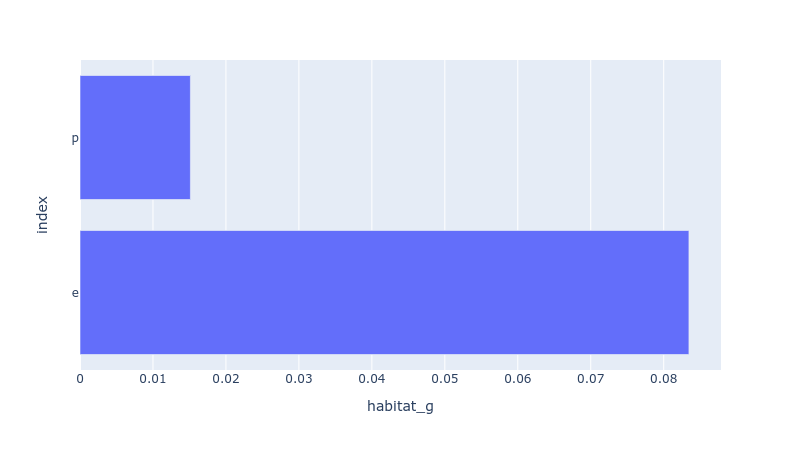

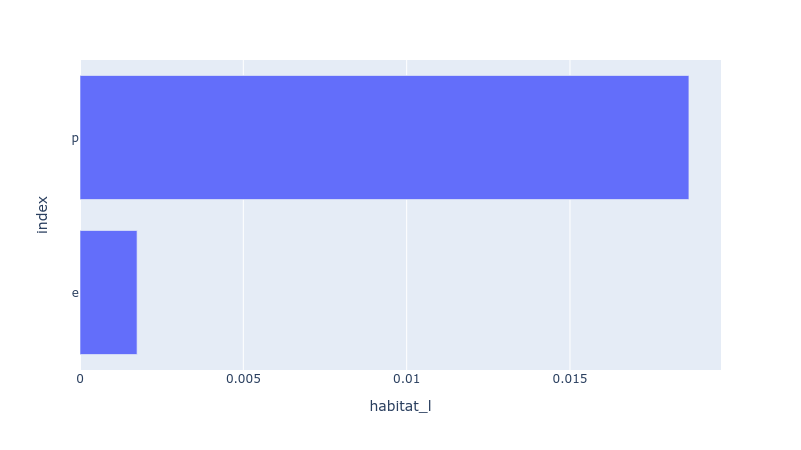

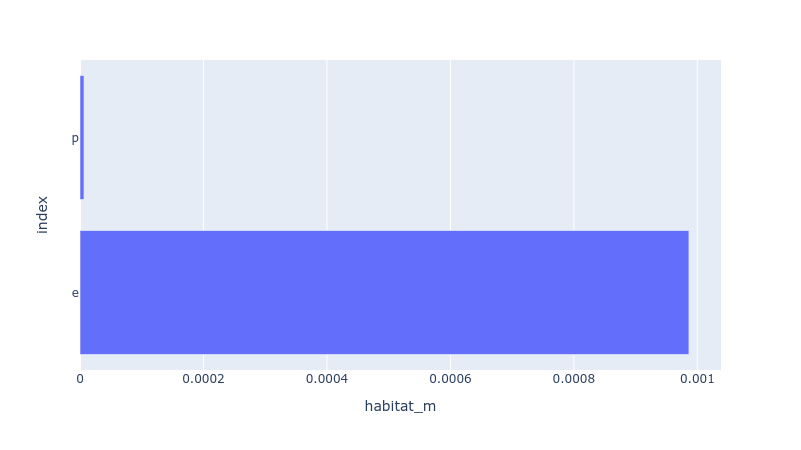

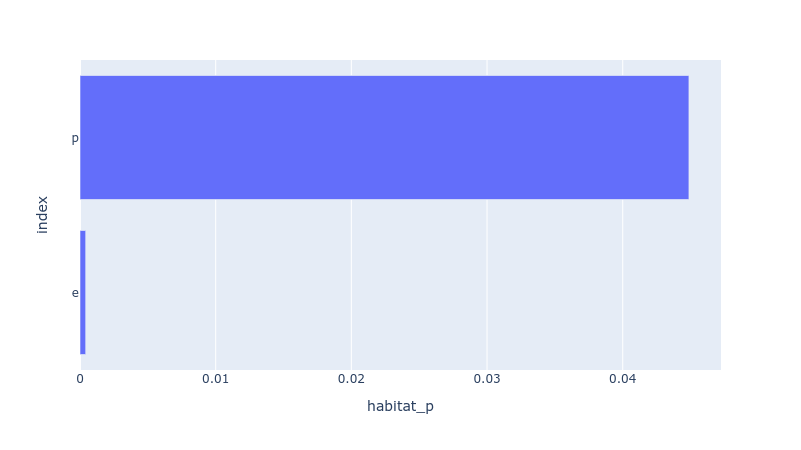

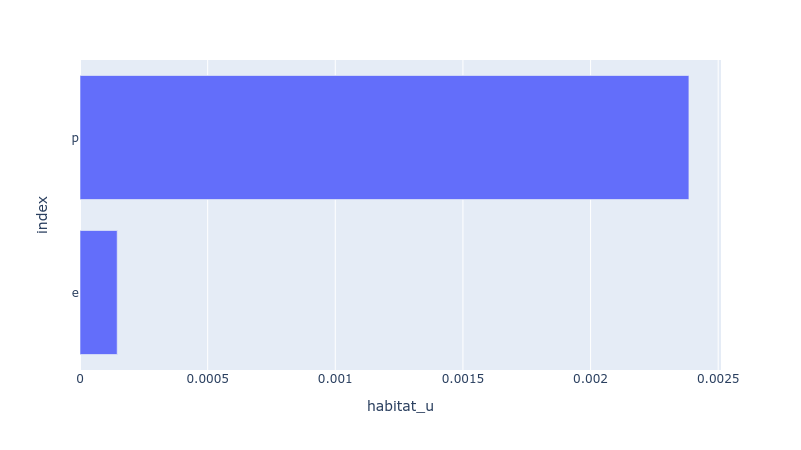

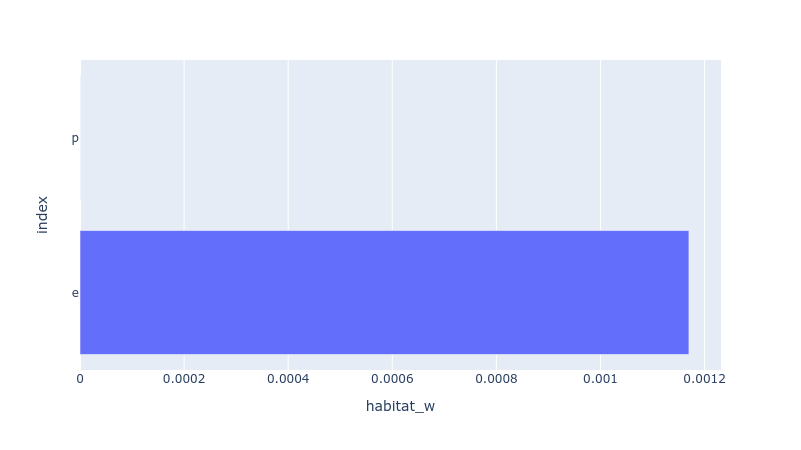

In [34]:
for i in output.columns:
  fig = px.bar(output, x=i)
  (fig.show())

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="n+-#0`*wD8rg+dSg6M^w">i</variable><variable id="B1+(FA+B_0M9*6bKcj,o">output</variable><variable id="AriMCkUM!81vTeAcb+6,">fig</variable><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable></variables><block type="controls_forEach" id="7YJ)K?q9poiHMo2hO,si" x="159" y="297"><field name="VAR" id="n+-#0`*wD8rg+dSg6M^w">i</field><value name="LIST"><block type="varGetProperty" id="k3#lLk(++xN{Qk3$B!$/"><field name="VAR" id="B1+(FA+B_0M9*6bKcj,o">output</field><field name="MEMBER">columns</field><data>output:columns</data></block></value><statement name="DO"><block type="variables_set" id="JN`QXdt~zSW=Hr{(pqls"><field name="VAR" id="AriMCkUM!81vTeAcb+6,">fig</field><value name="VALUE"><block type="varDoMethod" id="{:}eVR02P7FStzQGj0GV"><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">bar</field><data>px:bar</data><value name="INPUT"><block type="lists_create_with" id="+1ab50iuN1{=}kB6mhZH"><mutation items="2"></mutation><value name="ADD0"><block type="variables_get" id="mQ9=gXbU-Tlr[a!+Z~PN"><field name="VAR" id="B1+(FA+B_0M9*6bKcj,o">output</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="hJq@W1q];BsF7]9/8:rP"><field name="CODE">x=i</field></block></value></block></value></block></value><next><block type="valueNoOutputCodeBlock" id="(zDrmSRou~?8NOFz?_:t"><field name="CODE"></field><value name="INPUT"><block type="varDoMethod" id="S6kF2H)`W^?,.3{VU8x1"><field name="VAR" id="AriMCkUM!81vTeAcb+6,">fig</field><field name="MEMBER">show</field><data>fig:show</data></block></value></block></next></block></statement></block></xml>

------------------
**QUESTION:**

Are there any single features you think you'd trust to tell the difference between edible and poisonous?

**ANSWER: (click here to edit)**

*`habitat_w` looks pretty good. There are quite a few that seem to be 100% diagnostic.*

-------------------

## Submit your work

When you have finished the notebook, please download it, log in to [OKpy](https://okpy.org/) using "Student Login", and submit it there.

Then let your instructor know on Slack.
